#**STEP 1 : PERKENALAN**

**MILESTONES 1**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Logistic Regression, SVM, Decision Tree. Random Forest, KNN, Naive Bayes and Other Algorithm**

**Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:**

* Mampu memahami konsep supervised learning
* Mampu mempersiapkan data untuk digunakan dalam model supervised learning
* Mampu mengimplementasikan supervised learning dengan data yang diberikan
* Mampu melakukan evaluasi model
* Mampu melakukan model tuning

## **STEP 2 : IMPORTING LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import time
import os
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.utils import resample
from graphviz import Source
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Seaborn bertujuan agar visualisasi menjadi bagian penting dari proses eksplorasi dan pemahaman data.

* Plotly merupakan library grafik open source yang dapat digunakan untuk membuat visualisasi data. Library ini dibangun di atas library JavaScript Plotly dan dapat digunakan untuk membuat visualisasi data berbasis web yang dapat ditampilkan pada jupyter notebook atau aplikasi web menggunakan dash dan dapat pula disimpan sebagai file HTML.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

## **STEP 3 : DATA LOADING**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Formating**

In [3]:
# Memudahkan untuk bisa melihat semua kolom
pd.set_option('display.max_columns', 100)

# Set nilai random agar nilainya konstan
np.random.seed(77)

**Proses Read dataset**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 1/Milestone/bank-additional-full.csv',sep=";")

## **STEP 4 : DATA EXPLORATION**

**Data memiliki jumlah baris 41188 dan jumlah kolom 21**

In [5]:
data.shape

(41188, 21)

**Melihat isi 10 data pertama**

In [6]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Melihat 10 data Middle**

In [7]:
41188 / 2

20594.0

In [8]:
data[20590:20600]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20590,54,services,married,high.school,no,no,no,cellular,aug,tue,321,4,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20591,41,technician,married,professional.course,no,no,no,cellular,aug,tue,1476,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20592,35,technician,married,university.degree,no,no,yes,cellular,aug,tue,204,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20593,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,161,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20594,36,technician,married,university.degree,no,yes,no,cellular,aug,tue,120,3,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20595,46,services,married,basic.4y,unknown,no,no,cellular,aug,tue,507,3,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20596,31,admin.,divorced,university.degree,no,yes,no,cellular,aug,wed,77,6,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20597,60,services,married,basic.4y,no,yes,no,telephone,aug,wed,767,7,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20598,54,blue-collar,married,basic.9y,unknown,yes,no,cellular,aug,wed,388,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20599,56,admin.,married,professional.course,no,yes,no,cellular,aug,wed,106,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


**Melihat isi 10 data terakhir**

In [9]:
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


**Melihat nama kolom pada data**

In [10]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

**Tentang dataset ini :**

**Source :** https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

**Data Set Information :**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Attribute Information :**

Input variables:

**bank client data :**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign :**
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
**other attributes :**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**social and economic context attributes**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target) :**
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

**Melihat info data dan mengambil informasi tipe data dari tiap kolom**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Melihat nilai keseluruhan data dari masing-masing kolom**

In [12]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Melihat nilai data yang kolomnya bertipe data object**

In [13]:
data.select_dtypes("object").describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


**Melihat nilai data yang kolomnya bertipe data number**

In [14]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## **STEP 5 : DATA CLEANING**

**Membuat variabel baru dan mengcopy dataset yang sudah di load sebelumnya, fungsi dari mengcopy data sebelum diolah adalah untuk menjaga values asli dari dataset tersebut.**

In [15]:
dtc = data.copy()

**Melihat jumlah data yang missing values pada semua kolom**

In [16]:
dtc.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
dtc.isnull().sum().any()

False

**Melihat nilai unique dari semua kolom pada dataset.**

In [18]:
unique_value = dtc.columns
for column in unique_value:
    print(f"{'Columns : ' + column} \n {dtc[column].unique()} \n")

Columns : age 
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

Columns : job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Columns : marital 
 ['married' 'single' 'divorced' 'unknown'] 

Columns : education 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Columns : default 
 ['no' 'unknown' 'yes'] 

Columns : housing 
 ['no' 'yes' 'unknown'] 

Columns : loan 
 ['no' 'yes' 'unknown'] 

Columns : contact 
 ['telephone' 'cellular'] 

Columns : month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

Columns : day_of_week 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Columns : duration 
 [ 261  149  226 ... 1246 1556 18

**Melihat apakah ada data yang duplicate**

In [19]:
dtc.duplicated().any()

True

In [20]:
dtc.duplicated().sum()

12

**Terdapat data yang duplicate dan berjumlah 12**

In [21]:
#memperlihatkan semua baris yang diduplikasi
dtc.loc[dtc.duplicated(keep=False),:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


**Menghapus semua data yang duplicate dengan cara drop duplicates**

In [22]:
dtc.drop_duplicates(inplace=True)

**Melihat kembali untuk memastikan tidak ada data yang duplicated**

In [23]:
dtc.duplicated().any()

False

**Menemukan data yang anomali pada kolom pdays, yang memiliki nilai 999**

In [24]:
dtc.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [25]:
dtc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Melihat nilai median dan mean dari kolom pdays**

In [26]:
dtc['pdays'].head(10).median

<bound method Series.median of 0    999
1    999
2    999
3    999
4    999
5    999
6    999
7    999
8    999
9    999
Name: pdays, dtype: int64>

In [27]:
dtc['pdays'].head(10).mean

<bound method Series.mean of 0    999
1    999
2    999
3    999
4    999
5    999
6    999
7    999
8    999
9    999
Name: pdays, dtype: int64>

**Mengganti nilai 999 pada kolom pdyas menjadi 6 yang merupakan nilai median atau meannya**

In [28]:
dtc['pdays'].replace([999],[6], inplace=True)

**Cek kembali value pada kolom pdays**

In [29]:
dtc['pdays'].describe()

count    41176.000000
mean         6.000534
std          0.733449
min          0.000000
25%          6.000000
50%          6.000000
75%          6.000000
max         27.000000
Name: pdays, dtype: float64

In [30]:
dtc['pdays'].head(10)

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: pdays, dtype: int64

##**STEP 6 : EXPLORATORY DATA ANALYSIS (EDA)**

### **Common**

In [31]:
#set plot style for EDA
plt.style.use('fivethirtyeight')

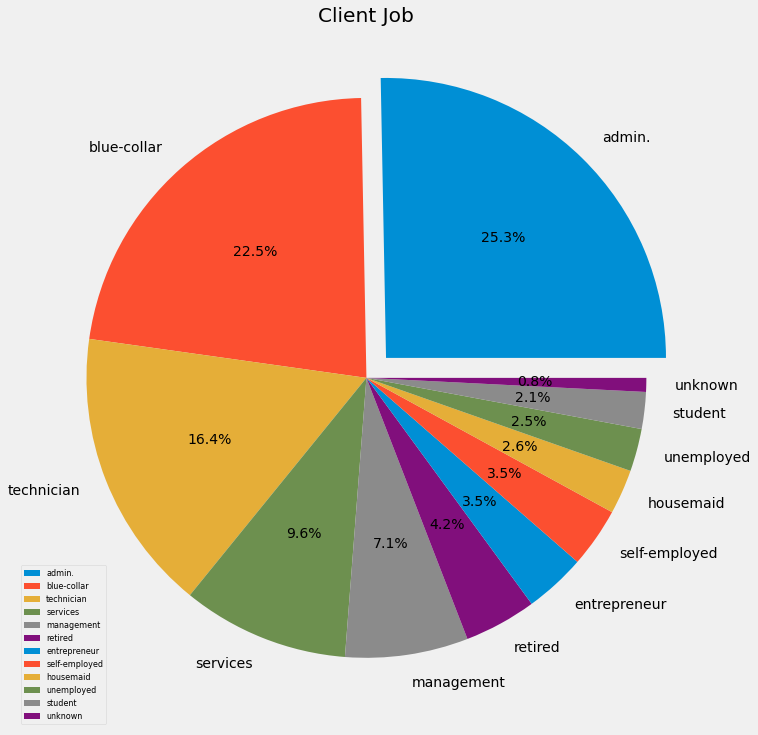

In [32]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize = (15,12))
plt.pie(dtc['job'].value_counts(), labels=dtc['job'].value_counts().index, explode=explode, autopct='%1.1f%%')
plt.title("Client Job")
plt.legend(loc=3,prop={'size': 8})
plt.show()

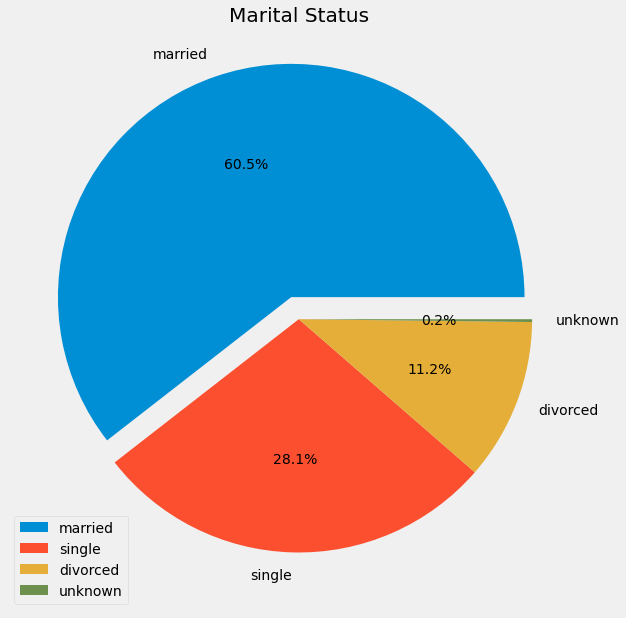

In [33]:
explode = (0.1, 0, 0, 0)
plt.figure(figsize = (10,10))
plt.pie(
    dtc['marital'].value_counts(),
    labels=dtc['marital'].value_counts().index, explode=explode,
    autopct='%1.1f%%'
)
plt.title("Marital Status")
plt.legend(loc=3,prop={'size': 14})
plt.show()

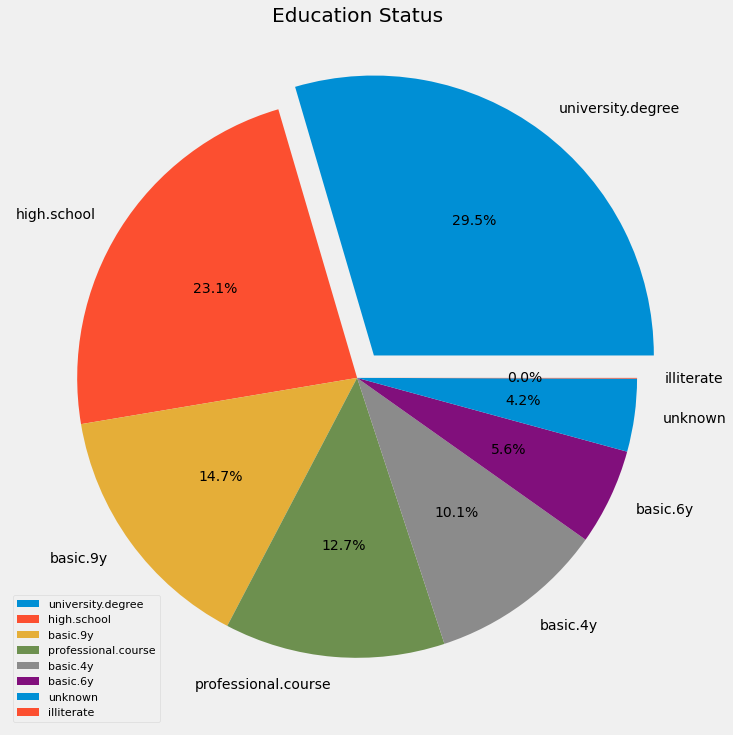

In [34]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize = (14,12))
plt.pie(
    dtc['education'].value_counts(),
    labels=dtc['education'].value_counts().index, explode=explode,
    autopct='%1.1f%%'
)
plt.title("Education Status")
plt.legend(loc=3,prop={'size': 11})
plt.show()

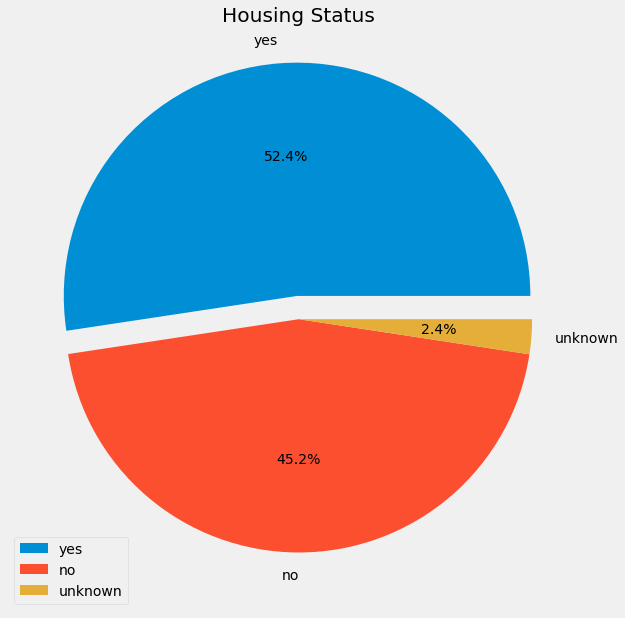

In [35]:
explode = (0.1, 0, 0)
plt.figure(figsize = (10,10))
plt.pie(
    dtc['housing'].value_counts(),
    labels=dtc['housing'].value_counts().index, explode=explode,
    autopct='%1.1f%%'
)
plt.title("Housing Status")
plt.legend(loc=3,prop={'size': 14})
plt.show()

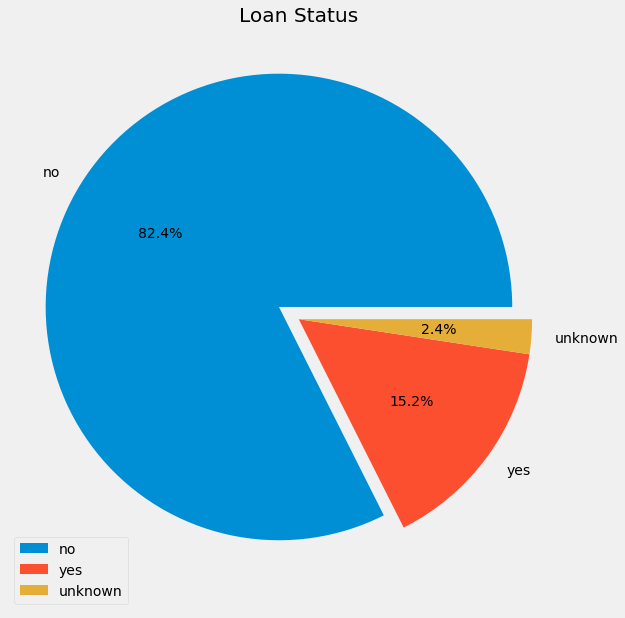

In [36]:
explode = (0.1, 0, 0)
plt.figure(figsize = (10,10))
plt.pie(
    dtc['loan'].value_counts(),
    labels=dtc['loan'].value_counts().index, explode=explode,
    autopct='%1.1f%%'
)
plt.title("Loan Status")
plt.legend(loc=3,prop={'size': 14})
plt.show()

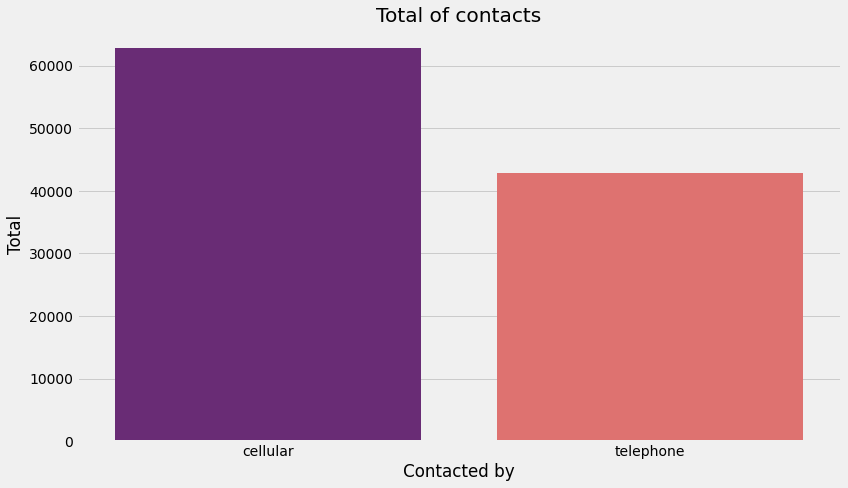

In [37]:
plt.figure(figsize = (12,7))

sns.barplot(x='contact',
            y='campaign',
            data=dtc.groupby(dtc['contact']).sum().campaign.reset_index(),
            palette='magma')

plt.ylabel("Total")
plt.xlabel("Contacted by")
plt.title('Total of contacts')

plt.tight_layout()
plt.show()

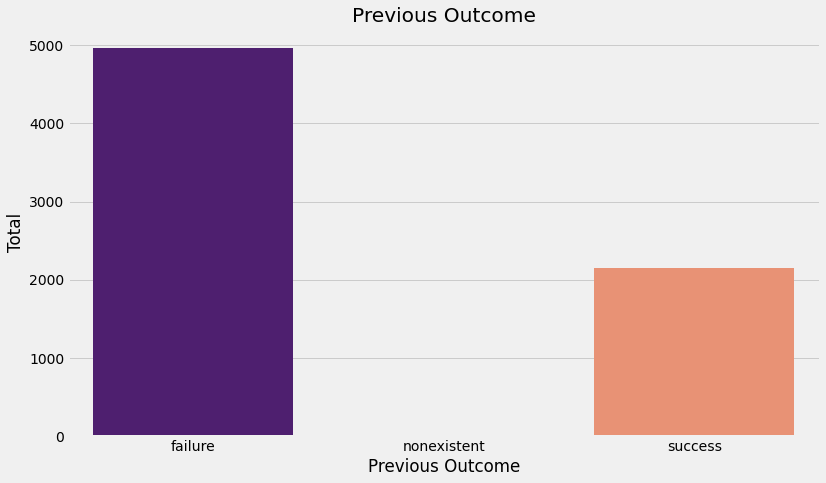

In [38]:
plt.figure(figsize = (12,7))

sns.barplot(
    x='poutcome', 
    y='previous', 
    data=dtc.groupby(dtc['poutcome']).sum().previous.reset_index(), 
    palette='magma')

plt.ylabel("Total")
plt.xlabel("Previous Outcome")
plt.title('Previous Outcome')

plt.show()

In [39]:
cat_column = list(dtc.select_dtypes(object).drop(columns = ["y"]).columns)

In [40]:
num_column = list(dtc.select_dtypes("number").columns)

### **Numerical Column**

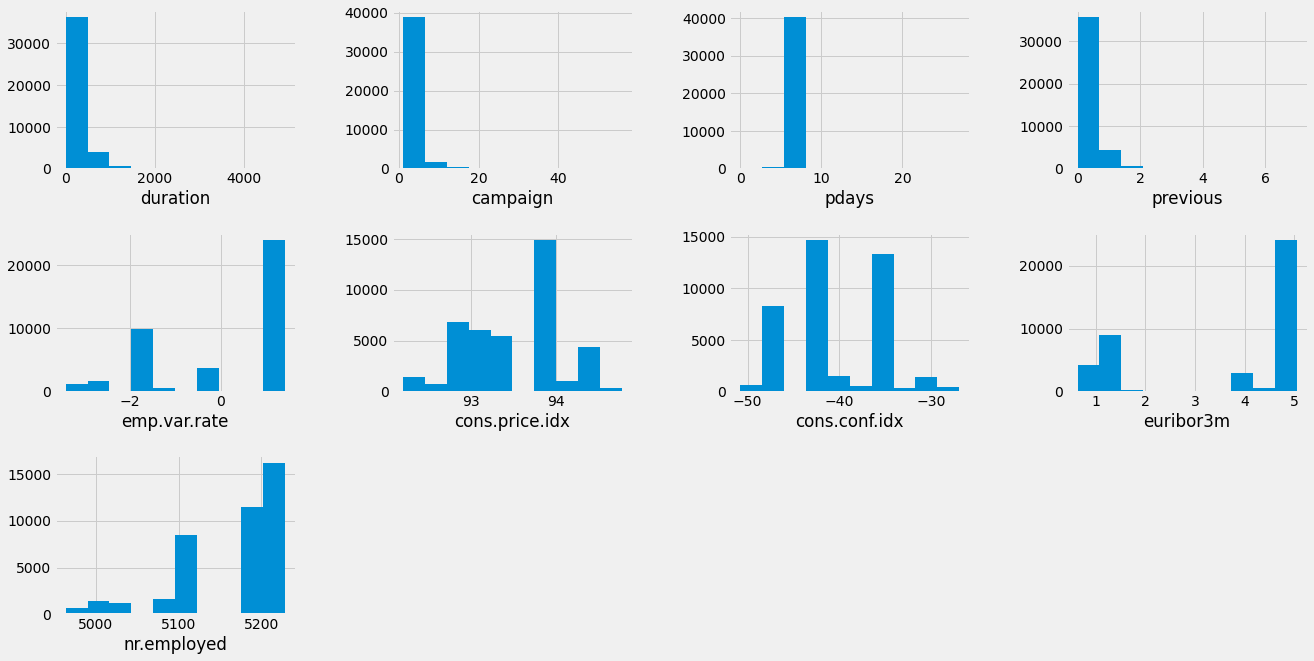

In [41]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(num_column)):
    ax = fig.add_subplot(5, 4, i)
    ax.hist(dtc[num_column[i]])
    #sns.histplot(df[num_column[i]])
    plt.xlabel(num_column[i])

### **Categorical Column**

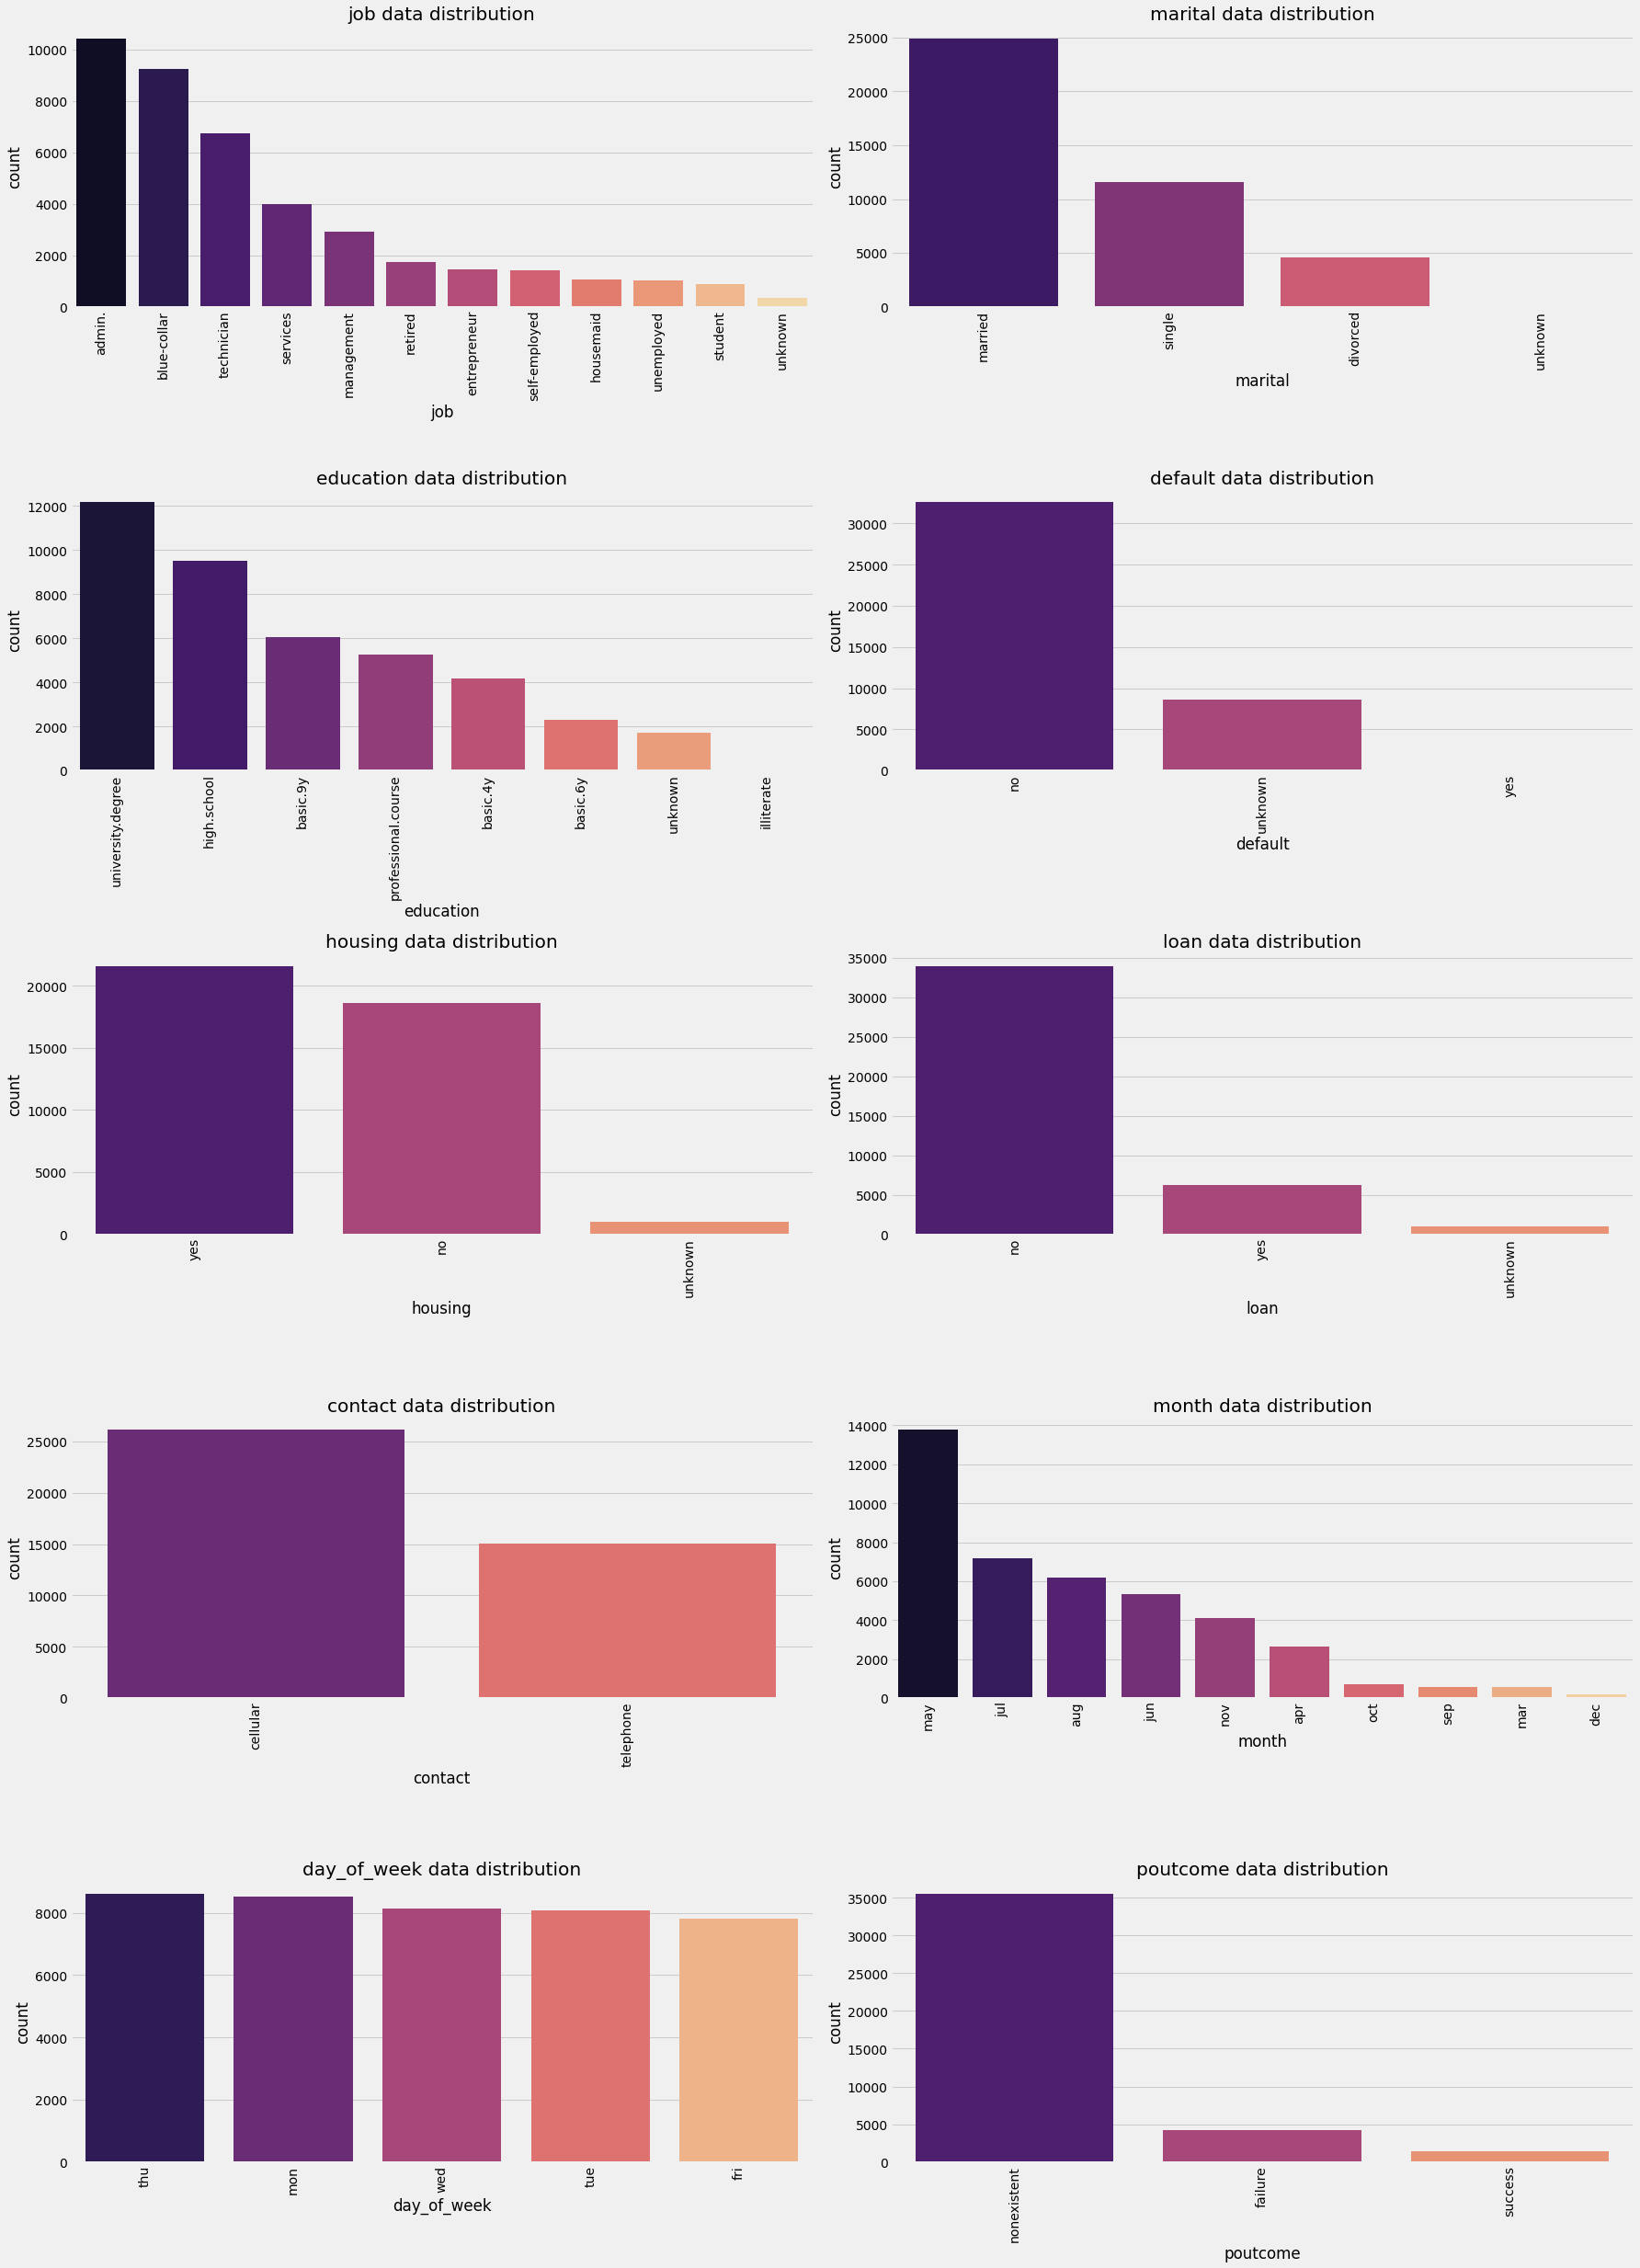

In [42]:
plt.figure(figsize = (25, 40))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = dtc[cat_column[i]],
        order = dtc[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "magma"
    )
    plt.title(str(cat_column[i]) + " data distribution", fontweight = 20)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### **Categorical column with Target**

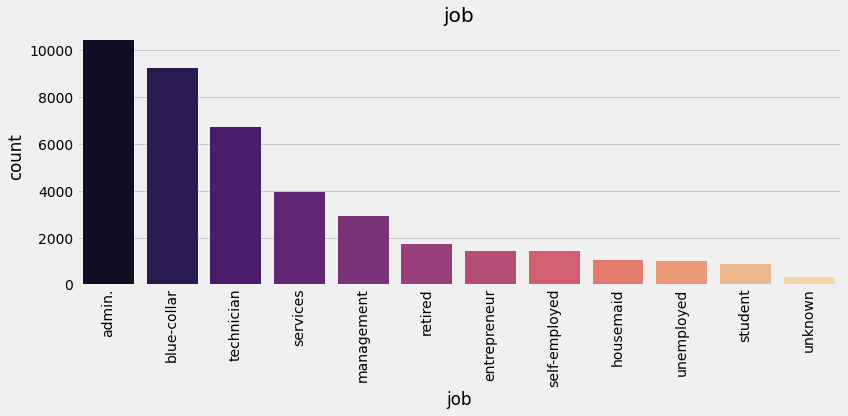

In [43]:
plt.figure(figsize = (12, 6))
sns.countplot(
    x = dtc["job"],
    order = dtc["job"].value_counts().sort_values(ascending = False).index,
    palette = "magma"
)
plt.title("job", fontweight = 20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

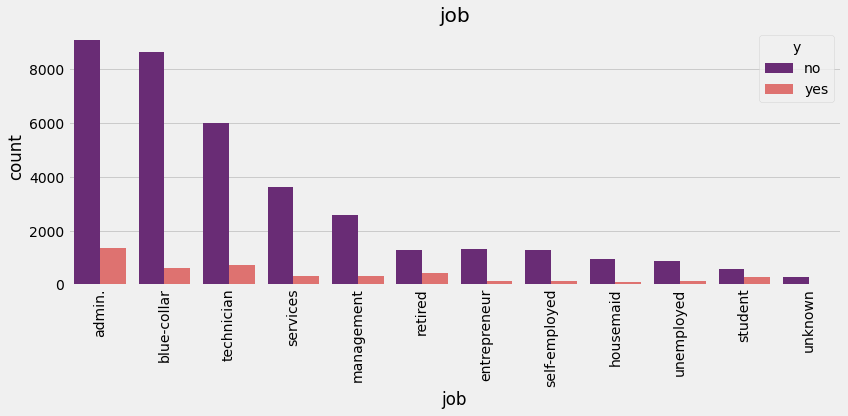

In [44]:
plt.figure(figsize = (12, 6))
sns.countplot(
    x = dtc["job"],
    hue = dtc['y'],
    order = dtc["job"].value_counts().sort_values(ascending = False).index,
    palette = "magma"
)
plt.title("job", fontweight = 20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

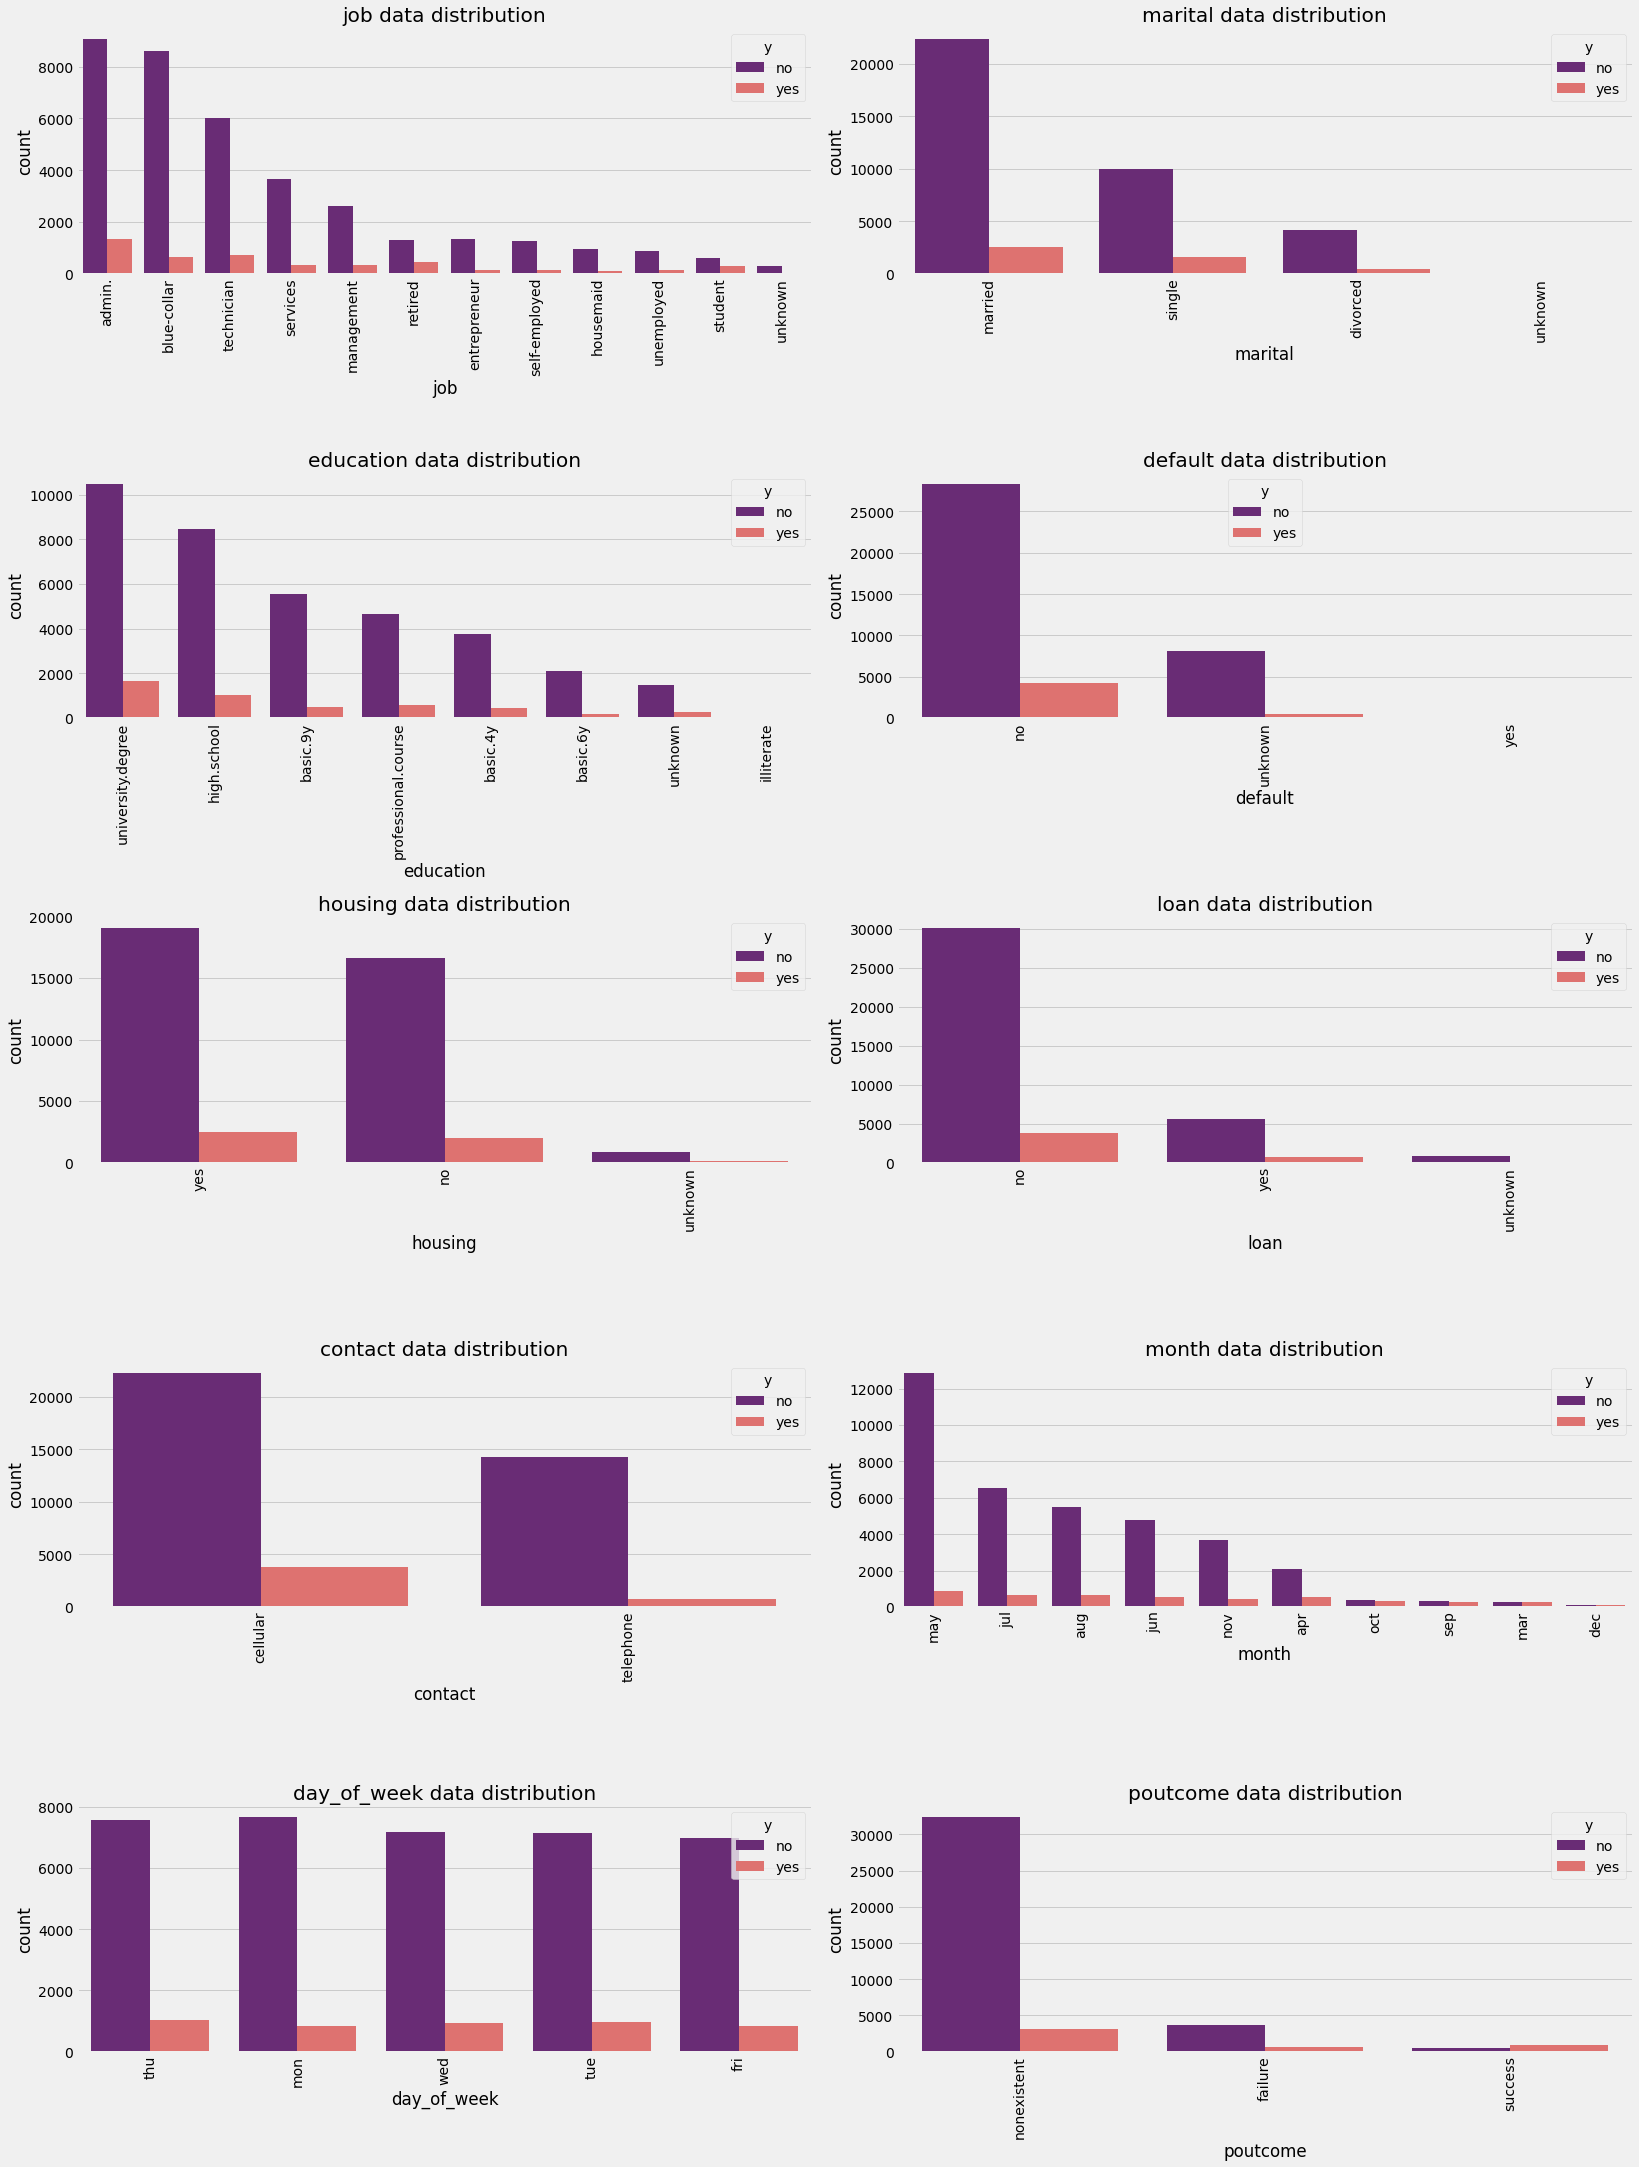

In [45]:
plt.figure(figsize = (23, 35))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = dtc[cat_column[i]],
        hue = dtc["y"],
        order = dtc[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "magma"
    )
    plt.title(str(cat_column[i]) + " data distribution", fontweight = 20)
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### **Target distribution data**

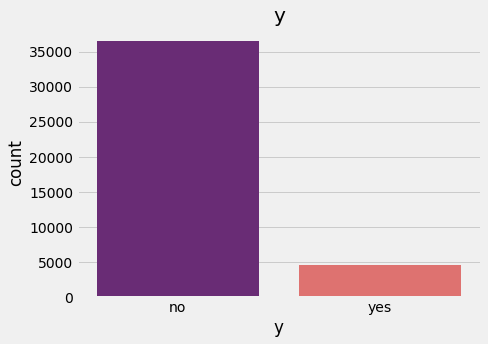

In [46]:
plt.figure(figsize = (7, 5))
sns.countplot(
    x = dtc["y"],
    order = dtc["y"].value_counts().sort_values(ascending = False).index,
    palette = "magma"
)
plt.title("y", fontweight = 20)

plt.tight_layout()
plt.show()

### **Correlation Matrix**

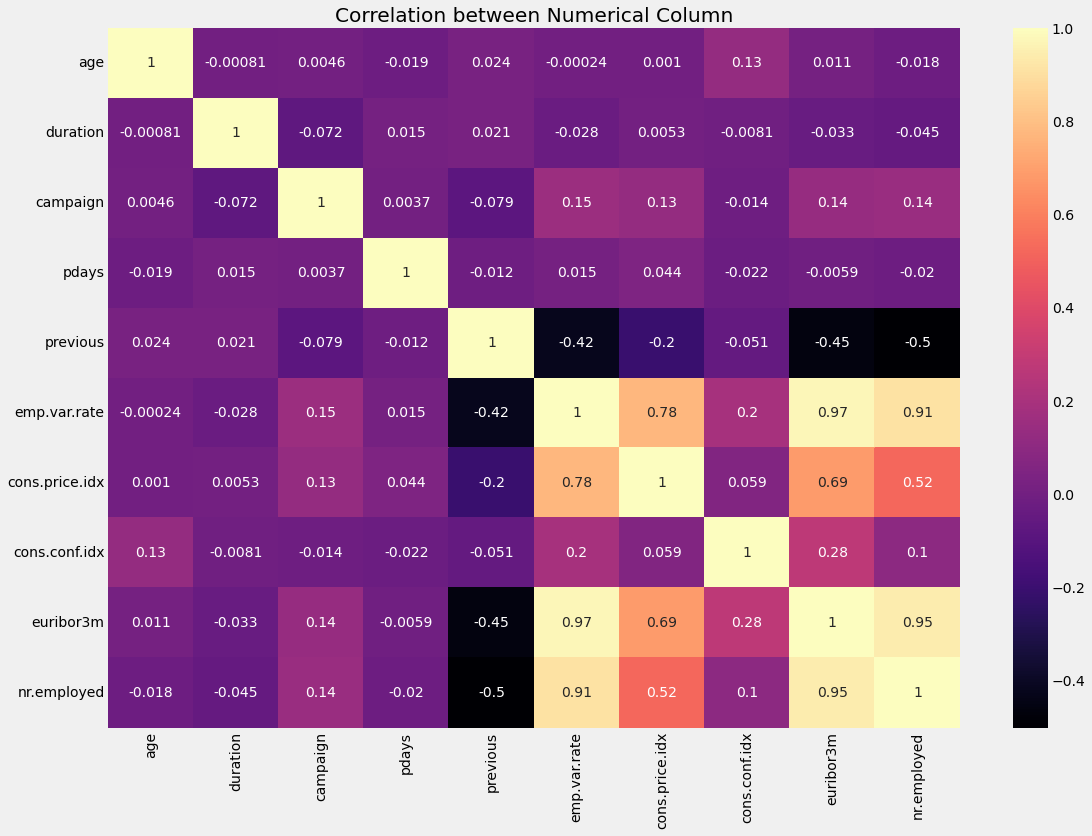

In [47]:
corr = dtc[num_column].corr(method = 'pearson')

plt.figure(figsize = (17, 12))
sns.heatmap(corr, cmap='magma', annot=True)
            
plt.title("Correlation between Numerical Column")
plt.show()

*Features need to be independent. We will drop features (column) that has strong correlation (>0.7) with others and has many negative correlation.*

Jadi fitur yang akan di drop adalah :
* age
* duration
* emp.var.rate
* euribor3m

## **STEP 7 : DATA PREPROCESSING**

### **Imbalance Data**

**Downsampling**

Kita perlu downsampling data target, karena itu akan mempengaruhi prediksi.

In [48]:
# their values is too much difference.
dtc["y"].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [49]:
from sklearn.utils import resample

# Separate majority and minority classes
dtc_majority = dtc[dtc.y=='no']
dtc_minority = dtc[dtc.y=='yes']
 
# Downsample majority class
dtc_majority_downsampled = resample(dtc_majority,
                        replace=False,      # sample without replacement
                        n_samples=4639,     # to match minority class
                        random_state=123)   # reproducible results
 
# Combine minority class with downsampled majority class
dtc_downsampled = pd.concat([dtc_majority_downsampled, dtc_minority])
 
# Display new class counts
dtc_downsampled.y.value_counts()

no     4639
yes    4639
Name: y, dtype: int64

In [50]:
new_dtp = dtc_downsampled
new_dtp.y.count()

9278

### **Feature Selection**

*Drop features (column) that has strong correlation (>0.7) and negative correlation.*

In [51]:
new_dtp.shape

(9278, 21)

In [52]:
new_dtp = new_dtp.drop(columns = ['age', 'duration', 'emp.var.rate', 'euribor3m'])

In [53]:
new_dtp.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
12349,services,single,high.school,no,yes,no,telephone,jul,fri,3,6,0,nonexistent,93.918,-42.7,5228.1,no
38112,admin.,divorced,high.school,no,yes,no,cellular,sep,tue,1,6,1,failure,92.379,-29.8,5017.5,no
24715,blue-collar,divorced,basic.9y,no,yes,yes,cellular,nov,mon,3,6,1,failure,93.200,-42.0,5195.8,no
37082,management,divorced,university.degree,no,yes,no,telephone,jul,wed,2,6,0,nonexistent,92.469,-33.6,5076.2,no
31417,management,married,university.degree,unknown,no,no,cellular,may,wed,2,6,0,nonexistent,92.893,-46.2,5099.1,no


### **Features Encoding**

In [54]:
new_dtp.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y'],
      dtype='object')

####**Job column**

In [55]:
job_dummies = pd.get_dummies(new_dtp['job'], prefix = 'job')
new_dtp = pd.concat([new_dtp, job_dummies], axis = 1)

In [56]:
new_dtp.loc[:,new_dtp.columns.str.contains('job')].head()

,job,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
12349,services,0,0,0,0,0,0,0,1,0,0,0,0
38112,admin.,1,0,0,0,0,0,0,0,0,0,0,0
24715,blue-collar,0,1,0,0,0,0,0,0,0,0,0,0
37082,management,0,0,0,0,1,0,0,0,0,0,0,0
31417,management,0,0,0,0,1,0,0,0,0,0,0,0


####**Marital column**

In [57]:
marital_dummies = pd.get_dummies(new_dtp['marital'], prefix = 'marital')
new_dtp = pd.concat([new_dtp, marital_dummies], axis = 1)

In [58]:
new_dtp.loc[:,new_dtp.columns.str.contains('marital')].head()

,marital,marital_divorced,marital_married,marital_single,marital_unknown
12349,single,0,0,1,0
38112,divorced,1,0,0,0
24715,divorced,1,0,0,0
37082,divorced,1,0,0,0
31417,married,0,1,0,0


####**Education column**

In [59]:
education_dummies = pd.get_dummies(new_dtp['education'], prefix = 'education')
new_dtp = pd.concat([new_dtp, education_dummies], axis = 1)

In [60]:
new_dtp.loc[:,new_dtp.columns.str.contains('education')].head()

,education,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
12349,high.school,0,0,0,1,0,0,0,0
38112,high.school,0,0,0,1,0,0,0,0
24715,basic.9y,0,0,1,0,0,0,0,0
37082,university.degree,0,0,0,0,0,0,1,0
31417,university.degree,0,0,0,0,0,0,1,0


####**Default column**

In [61]:
default_dummies = pd.get_dummies(new_dtp['default'], prefix = 'default')
new_dtp = pd.concat([new_dtp, default_dummies], axis = 1)

In [62]:
new_dtp.loc[:,new_dtp.columns.str.contains('default')].head()

,default,default_no,default_unknown
12349,no,1,0
38112,no,1,0
24715,no,1,0
37082,no,1,0
31417,unknown,0,1


####**Housing column**

In [63]:
housing_dummies = pd.get_dummies(new_dtp['housing'], prefix = 'housing')
new_dtp = pd.concat([new_dtp, housing_dummies], axis = 1)

In [64]:
new_dtp.loc[:,new_dtp.columns.str.contains('housing')].head()

,housing,housing_no,housing_unknown,housing_yes
12349,yes,0,0,1
38112,yes,0,0,1
24715,yes,0,0,1
37082,yes,0,0,1
31417,no,1,0,0


####**Loan column**

In [65]:
loan_dummies = pd.get_dummies(new_dtp['loan'], prefix = 'loan')
new_dtp = pd.concat([new_dtp, loan_dummies], axis = 1)

In [66]:
new_dtp.loc[:,new_dtp.columns.str.contains('loan')].head()

,loan,loan_no,loan_unknown,loan_yes
12349,no,1,0,0
38112,no,1,0,0
24715,yes,0,0,1
37082,no,1,0,0
31417,no,1,0,0


####**Contact column**

In [67]:
contact_dummies = pd.get_dummies(new_dtp['contact'], prefix = 'contact')
new_dtp = pd.concat([new_dtp, contact_dummies], axis = 1)

In [68]:
new_dtp.loc[:,new_dtp.columns.str.contains('contact')].head()

,contact,contact_cellular,contact_telephone
12349,telephone,0,1
38112,cellular,1,0
24715,cellular,1,0
37082,telephone,0,1
31417,cellular,1,0


####**Month column**

In [69]:
month_dummies = pd.get_dummies(new_dtp['month'], prefix = 'month')
new_dtp = pd.concat([new_dtp, month_dummies], axis = 1)

In [70]:
new_dtp.loc[:,new_dtp.columns.str.contains('month')].head()

,month,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
12349,jul,0,0,0,1,0,0,0,0,0,0
38112,sep,0,0,0,0,0,0,0,0,0,1
24715,nov,0,0,0,0,0,0,0,1,0,0
37082,jul,0,0,0,1,0,0,0,0,0,0
31417,may,0,0,0,0,0,0,1,0,0,0


####**Day of Week column**

In [71]:
day_of_week_dummies = pd.get_dummies(new_dtp['day_of_week'], prefix = 'day_of_week')
new_dtp = pd.concat([new_dtp, day_of_week_dummies], axis = 1)

In [72]:
new_dtp.loc[:,new_dtp.columns.str.contains('day_of_week')].head()

,day_of_week,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
12349,fri,1,0,0,0,0
38112,tue,0,0,0,1,0
24715,mon,0,1,0,0,0
37082,wed,0,0,0,0,1
31417,wed,0,0,0,0,1


####**Poutcome column**

In [73]:
poutcome_dummies = pd.get_dummies(new_dtp['poutcome'], prefix = 'poutcome')
new_dtp = pd.concat([new_dtp, poutcome_dummies], axis = 1)

In [74]:
new_dtp.loc[:,new_dtp.columns.str.contains('poutcome')].head()

,poutcome,poutcome_failure,poutcome_nonexistent,poutcome_success
12349,nonexistent,0,1,0
38112,failure,1,0,0
24715,failure,1,0,0
37082,nonexistent,0,1,0
31417,nonexistent,0,1,0


###**Target Encoding**

In [75]:
new_dtp['y'].replace(['no', 'yes'],[0,1], inplace=True)

In [76]:
new_dtp.drop(columns = cat_column, inplace = True)

In [77]:
new_dtp.head()

,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12349,3,6,0,93.918,-42.7,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
38112,1,6,1,92.379,-29.8,5017.5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
24715,3,6,1,93.200,-42.0,5195.8,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
37082,2,6,0,92.469,-33.6,5076.2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
31417,2,6,0,92.893,-46.2,5099.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [78]:
new_dtp.shape

(9278, 59)

### **Split dataset to features (X) dan target (y)**

In [79]:
X = new_dtp.drop(columns = ["y"])
y = new_dtp["y"]

In [80]:
X.shape, y.shape

((9278, 58), (9278,))

#### **Split Dataset**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 77)

In [82]:
X_train.shape, y_train.shape

((6494, 58), (6494,))

In [83]:
X_test.shape, y_test.shape

((2784, 58), (2784,))

#### **Scaling**

In [84]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

## **STEP 8 : DEFINE MODEL AND TRAINING**

### **Logistic Regression**

In [86]:
model_log = LogisticRegression(solver="lbfgs", random_state=77)
%time model_log.fit(X_train_trf, y_train)

CPU times: user 64.8 ms, sys: 43.4 ms, total: 108 ms
Wall time: 72.1 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=77, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **SVM Classifier**

In [87]:
model_svc_rbf = SVC(kernel='rbf', random_state=77, probability=True)
%time model_svc_rbf.fit(X_train_trf, y_train)

CPU times: user 21.2 s, sys: 215 ms, total: 21.4 s
Wall time: 21.2 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=77, shrinking=True, tol=0.001,
    verbose=False)

### **Decision Tree Classifier**

In [88]:
model_tree = DecisionTreeClassifier(random_state=77)
%time model_tree.fit(X_train_trf, y_train)

CPU times: user 43.7 ms, sys: 4.93 ms, total: 48.6 ms
Wall time: 47.9 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=77, splitter='best')

### **Random Forest Classifier**

In [89]:
model_rf = RandomForestClassifier(random_state=77)
%time model_rf.fit(X_train_trf, y_train)

CPU times: user 847 ms, sys: 2.2 ms, total: 849 ms
Wall time: 843 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=77, verbose=0,
                       warm_start=False)

### **K-Nearest Neighbor Classifier**

In [90]:
model_knn = KNeighborsClassifier()
%time model_knn.fit(X_train_trf, y_train)

CPU times: user 126 ms, sys: 832 µs, total: 127 ms
Wall time: 128 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### **Naive Bayes**

In [91]:
model_naive = GaussianNB()
%time model_naive.fit(X_train_trf, y_train)

CPU times: user 8.25 ms, sys: 883 µs, total: 9.13 ms
Wall time: 10.7 ms


GaussianNB(priors=None, var_smoothing=1e-09)

### **ADA Boost Classifier**

In [92]:
model_ada = AdaBoostClassifier(random_state=77)
%time model_ada.fit(X_train_trf, y_train)

CPU times: user 343 ms, sys: 1.62 ms, total: 345 ms
Wall time: 344 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=77)

## **STEP 9 : MODEL EVALUATION**

In [93]:
# Evaluate function
def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINING RESULTS:")
    print("="*75)
    model_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}\n")
    print(f"ACCURACY SCORE  : {accuracy_score(y_train, y_train_pred):.4f}\n")
    print(f"F1 SCORE        : {f1_score(y_train, y_train_pred)}\n")
    print(f"ROC_AUC SCORE   : {roc_auc_score(y_train, y_train_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n\n{model_report}\n\n")

    print("TESTING RESULTS:")
    print("="*75)
    model_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}\n")
    print(f"ACCURACY SCORE  : {accuracy_score(y_test, y_test_pred):.4f}\n")
    print(f"F1 SCORE        : {f1_score(y_test, y_test_pred)}\n")
    print(f"ROC_AUC SCORE   : {roc_auc_score(y_test, y_test_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n\n{model_report}\n\n")

###**Logistic Regression**

In [94]:
%time evaluate(model_log, X_train_trf, y_train, X_test_trf, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[2667  540]
 [1182 2105]]

ACCURACY SCORE  : 0.7348

F1 SCORE        : 0.7097100472016183

ROC_AUC SCORE   : 0.7360099584410396

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.692907     0.795841  0.734832     0.744374      0.745008
recall        0.831618     0.640402  0.734832     0.736010      0.734832
f1-score      0.755952     0.709710  0.734832     0.732831      0.732546
support    3207.000000  3287.000000  0.734832  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1211  221]
 [ 478  874]]

ACCURACY SCORE  : 0.7489

F1 SCORE        : 0.7143440948099714

ROC_AUC SCORE   : 0.7460600476017322

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.716992     0.798174  0.748922     0.757583      0.756417
recall        0.845670     0.646450  0.748922     0.746060      0.748922
f1-score      0.776033     0.714344

In [95]:
# accuracy
acc_scores = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, model_log.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_log.predict(X_test_trf))
    },
}

In [96]:
acc_scores['Logistic Regression'] = {
        'Train': accuracy_score(y_train, model_log.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_log.predict(X_test_trf))
    }

In [97]:
# f1 scores
f1scores = {
    'Logistic Regression': {
        'Train': f1_score(y_train, model_log.predict(X_train_trf)),
        'Test': f1_score(y_test, model_log.predict(X_test_trf))
    },
}

In [98]:
f1scores['Logistic Regression'] = {
        'Train': f1_score(y_train, model_log.predict(X_train_trf)),
        'Test': f1_score(y_test, model_log.predict(X_test_trf))
    }

### **SVM**

In [99]:
%time evaluate(model_svc_rbf, X_train_trf, y_train, X_test_trf, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[2828  379]
 [1213 2074]]

ACCURACY SCORE  : 0.7549

F1 SCORE        : 0.7226480836236935

ROC_AUC SCORE   : 0.7563957531673422

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.699827     0.845495  0.754851     0.772661      0.773558
recall        0.881821     0.630970  0.754851     0.756396      0.754851
f1-score      0.780353     0.722648  0.754851     0.751501      0.751145
support    3207.000000  3287.000000  0.754851  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1240  192]
 [ 510  842]]

ACCURACY SCORE  : 0.7478

F1 SCORE        : 0.7057837384744341

ROC_AUC SCORE   : 0.7443514263991272

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.708571     0.814313  0.747845     0.761442      0.759923
recall        0.865922     0.622781  0.747845     0.744351      0.747845
f1-score      0.779384     0.705784

In [100]:
acc_scores['SVM Classifier'] = {
        'Train': accuracy_score(y_train, model_svc_rbf.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_svc_rbf.predict(X_test_trf))
    }

In [101]:
f1scores['SVM Classifier'] = {
        'Train': f1_score(y_train, model_svc_rbf.predict(X_train_trf)),
        'Test': f1_score(y_test, model_svc_rbf.predict(X_test_trf))
    }

### **Decision Tree**

In [102]:
%time evaluate(model_tree, X_train_trf, y_train, X_test_trf, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[3191   16]
 [ 151 3136]]

ACCURACY SCORE  : 0.9743

F1 SCORE        : 0.9740642956980897

ROC_AUC SCORE   : 0.9745361839200053

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.954817     0.994924  0.974284     0.974871      0.975118
recall        0.995011     0.954061  0.974284     0.974536      0.974284
f1-score      0.974500     0.974064  0.974284     0.974282      0.974279
support    3207.000000  3287.000000  0.974284  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[942 490]
 [500 852]]

ACCURACY SCORE  : 0.6444

F1 SCORE        : 0.6325167037861915

ROC_AUC SCORE   : 0.6439993719215894

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.653259     0.634873  0.644397     0.644066      0.644331
recall        0.657821     0.630178  0.644397     0.643999      0.644397
f1-score      0.655532     0.632517  0.

In [103]:
acc_scores['Decision Tree Classifier'] = {
        'Train': accuracy_score(y_train, model_tree.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_tree.predict(X_test_trf))
    }

In [104]:
f1scores['Decision Tree Classifier'] = {
        'Train': f1_score(y_train, model_tree.predict(X_train_trf)),
        'Test': f1_score(y_test, model_tree.predict(X_test_trf))
    }

### **Random Forest**

In [105]:
%time evaluate(model_rf, X_train_trf, y_train, X_test_trf, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[3137   70]
 [  97 3190]]

ACCURACY SCORE  : 0.9743

F1 SCORE        : 0.9744921338017414

ROC_AUC SCORE   : 0.9743312777257765

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.970006     0.978528  0.974284     0.974267      0.974319
recall        0.978173     0.970490  0.974284     0.974331      0.974284
f1-score      0.974072     0.974492  0.974284     0.974282      0.974285
support    3207.000000  3287.000000  0.974284  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1090  342]
 [ 449  903]]

ACCURACY SCORE  : 0.7159

F1 SCORE        : 0.6954177897574124

ROC_AUC SCORE   : 0.7145362963207827

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.708252     0.725301  0.715876     0.716777      0.716532
recall        0.761173     0.667899  0.715876     0.714536      0.715876
f1-score      0.733760     0.695418

In [106]:
acc_scores['Random Forest Classifier'] = {
        'Train': accuracy_score(y_train, model_rf.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_rf.predict(X_test_trf))
    }

In [107]:
f1scores['Random Forest Classifier'] = {
        'Train': f1_score(y_train, model_rf.predict(X_train_trf)),
        'Test': f1_score(y_test, model_rf.predict(X_test_trf))
    }

### **KNN**

In [108]:
%time evaluate(model_knn, X_train_trf, y_train, X_test_trf, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[2640  567]
 [ 885 2402]]

ACCURACY SCORE  : 0.7764

F1 SCORE        : 0.7679028132992326

ROC_AUC SCORE   : 0.7769783906496751

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.748936     0.809027  0.776409     0.778981      0.779352
recall        0.823199     0.730758  0.776409     0.776978      0.776409
f1-score      0.784314     0.767903  0.776409     0.776108      0.776007
support    3207.000000  3287.000000  0.776409  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1044  388]
 [ 496  856]]

ACCURACY SCORE  : 0.6825

F1 SCORE        : 0.6594761171032357

ROC_AUC SCORE   : 0.6810931870020825

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.677922     0.688103  0.682471     0.683012      0.682866
recall        0.729050     0.633136  0.682471     0.681093      0.682471
f1-score      0.702557     0.659476

In [109]:
acc_scores['KNN Classifier'] = {
        'Train': accuracy_score(y_train, model_knn.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_knn.predict(X_test_trf))
    }

In [110]:
f1scores['KNN Classifier'] = {
        'Train': f1_score(y_train, model_knn.predict(X_train_trf)),
        'Test': f1_score(y_test, model_knn.predict(X_test_trf))
    }

### **Naive Bayes**

In [111]:
%time evaluate(model_naive, X_train_trf, y_train, X_test_trf, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[2889  318]
 [1777 1510]]

ACCURACY SCORE  : 0.6774

F1 SCORE        : 0.5904203323558161

ROC_AUC SCORE   : 0.6801136830949259

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.619160     0.826039  0.677395     0.722600      0.723874
recall        0.900842     0.459385  0.677395     0.680114      0.677395
f1-score      0.733901     0.590420  0.677395     0.662161      0.661277
support    3207.000000  3287.000000  0.677395  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1283  149]
 [ 753  599]]

ACCURACY SCORE  : 0.6760

F1 SCORE        : 0.5704761904761905

ROC_AUC SCORE   : 0.6694985289742488

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.630157     0.800802  0.676006     0.715480      0.713028
recall        0.895950     0.443047  0.676006     0.669499      0.676006
f1-score      0.739908     0.570476

In [112]:
acc_scores['GaussianNB'] = {
        'Train': accuracy_score(y_train, model_naive.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_naive.predict(X_test_trf))
    }

In [113]:
f1scores['GaussianNB'] = {
        'Train': f1_score(y_train, model_naive.predict(X_train_trf)),
        'Test': f1_score(y_test, model_naive.predict(X_test_trf))
    }

### **ADA Boost**

In [114]:
%time evaluate(model_ada, X_train_trf, y_train, X_test_trf, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[2723  484]
 [1241 2046]]

ACCURACY SCORE  : 0.7344

F1 SCORE        : 0.7034553893759671

ROC_AUC SCORE   : 0.7357661105835093

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.686932     0.808696   0.73437     0.747814      0.748564
recall        0.849080     0.622452   0.73437     0.735766      0.734370
f1-score      0.759448     0.703455   0.73437     0.731452      0.731107
support    3207.000000  3287.000000   0.73437  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1229  203]
 [ 495  857]]

ACCURACY SCORE  : 0.7493

F1 SCORE        : 0.7106135986733001

ROC_AUC SCORE   : 0.7460579815543288

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.712877     0.808491  0.749282     0.760684      0.759310
recall        0.858240     0.633876  0.749282     0.746058      0.749282
f1-score      0.778834     0.710614

In [115]:
acc_scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, model_ada.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_ada.predict(X_test_trf))
    }

In [116]:
f1scores['AdaBoost'] = {
        'Train': f1_score(y_train, model_ada.predict(X_train_trf)),
        'Test': f1_score(y_test, model_ada.predict(X_test_trf))
    }

### **ROC Curve default setting**

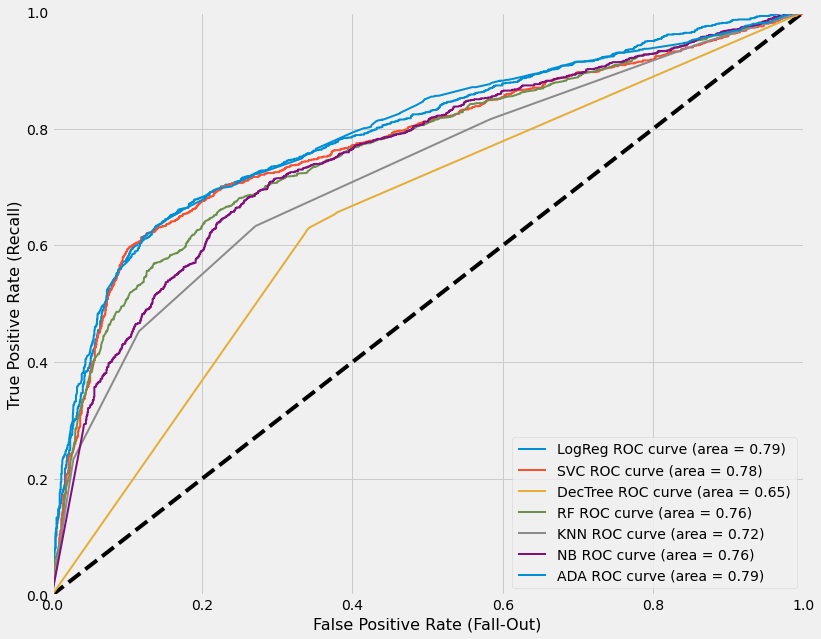

In [118]:
# ROC Curve default setting
plt.figure(figsize=(12, 10))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

labels=['LogReg','SVC','DecTree', 'RF','KNN', 'NB', 'ADA']
for idx,model in enumerate([model_log, model_svc_rbf, model_tree , model_rf, model_knn, model_naive, model_ada]):
    y_scores = model.predict_proba(X_test_trf)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right",prop={'size': 14})

## **STEP 10 : CROSS VALIDATION**

### **Logistic Regression CV**

In [119]:
%time accuracy_cv_lr = cross_val_score(model_log, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ',accuracy_cv_lr)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_lr.mean() * 100)

CPU times: user 2.8 s, sys: 1.69 s, total: 4.49 s
Wall time: 2.31 s
Cross Validation Score:  [0.41594828 0.42133621 0.46228448 0.55603448 0.48060345 0.82974138
 0.86853448 0.90517241 0.9180151  0.92880259]
Average Cross Validation score: 67.86472863891679


###**SVM CV**

In [120]:
%time accuracy_cv_svc = cross_val_score(model_svc_rbf, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ',accuracy_cv_svc)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_svc.mean() * 100)

CPU times: user 6min 2s, sys: 1.73 s, total: 6min 3s
Wall time: 6min 1s
Cross Validation Score:  [0.36637931 0.36099138 0.39547414 0.85021552 0.8512931  0.86422414
 0.85021552 0.86206897 0.86731392 0.86731392]
Average Cross Validation score: 71.35489900680727


### **Decision Tree CV**

In [121]:
%time accuracy_cv_tree = cross_val_score(model_tree, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ',accuracy_cv_tree)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_tree.mean() * 100)

CPU times: user 603 ms, sys: 2.05 ms, total: 605 ms
Wall time: 604 ms
Cross Validation Score:  [0.37392241 0.38146552 0.41271552 0.47952586 0.39331897 0.39224138
 0.47521552 0.37823276 0.55339806 0.43797195]
Average Cross Validation score: 42.7800794182197


### **Random Forest CV**

In [122]:
%time accuracy_cv_rf = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ',accuracy_cv_rf)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_rf.mean() * 100)

CPU times: user 10.4 s, sys: 52.8 ms, total: 10.5 s
Wall time: 10.4 s
Cross Validation Score:  [0.37931034 0.38469828 0.43211207 0.52909483 0.44827586 0.45150862
 0.54741379 0.48599138 0.61488673 0.50485437]
Average Cross Validation score: 47.781462727374176


### **KNN CV**

In [123]:
%time accuracy_cv_knn = cross_val_score(model_knn, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ',accuracy_cv_knn)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_knn.mean() * 100)

CPU times: user 2.19 s, sys: 66.3 ms, total: 2.25 s
Wall time: 2.2 s
Cross Validation Score:  [0.40301724 0.37823276 0.41810345 0.56142241 0.45797414 0.46443966
 0.56681034 0.61099138 0.61920173 0.47357066]
Average Cross Validation score: 49.537637633448654


### **Naive Bayes CV**

In [124]:
%time accuracy_cv_naive = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ',accuracy_cv_naive)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_naive.mean() * 100)

CPU times: user 134 ms, sys: 970 µs, total: 135 ms
Wall time: 138 ms
Cross Validation Score:  [0.4450431  0.4450431  0.5387931  0.60775862 0.53556034 0.59590517
 0.83405172 0.79418103 0.78425027 0.87270766]
Average Cross Validation score: 64.53294135699142


### **ADA Boost CV**

In [125]:
%time accuracy_cv_ada = cross_val_score(model_ada, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ',accuracy_cv_ada)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_ada.mean() * 100)

CPU times: user 4.38 s, sys: 37 ms, total: 4.42 s
Wall time: 4.4 s
Cross Validation Score:  [0.42133621 0.41594828 0.45474138 0.53448276 0.48168103 0.81465517
 0.55172414 0.78017241 0.85976268 0.60517799]
Average Cross Validation score: 59.19682048134509


## **STEP 11 : GRID SEARCH**

### **Logistic Regression GR**

In [126]:
tstart = time.time() #for calculating processing time

C = [0.1, 0.5, 1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
verbose = [1, 2, 3]

params_grid = {'C': C,
               'solver': solver,
               'verbose': verbose}

model_log = LogisticRegression(random_state=77)
model_log_gridCV = GridSearchCV(model_log, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

model_log_gridCV.fit(X_train_trf, y_train)
best_params = model_log_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')
print("\n")

model_log_best = LogisticRegression(**best_params)
model_log_best.fit(X_train_trf, y_train)

evaluate(model_log_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Best parameters: {'C': 0.5, 'solver': 'newton-cg', 'verbose': 1}
Elapsed prediction time:  12861.32  ms


TRAINING RESULTS:
CONFUSION MATRIX:
[[2666  541]
 [1182 2105]]

ACCURACY SCORE  : 0.7347

F1 SCORE        : 0.709590426428451

ROC_AUC SCORE   : 0.7358540494918658

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.692827     0.795540  0.734678     0.744184      0.744817
recall        0.831307     0.640402  0.734678     0.735854      0.734678
f1-score      0.755776     0.709590  0.734678     0.732683      0.732399
support    3207.000000  3287.000000  0.734678  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1211  221]
 [ 478  874]]

ACCURACY SCORE  : 0.7489

F1 SCORE        : 0.7143440948099714

ROC_AUC SCORE   : 0.7460600476017322

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.716992     0.798174  0.748922     0.757583      0.756417
rec

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [127]:
# accuracy best param
acc_scores_best = {
    'LR Best': {
        'Train': accuracy_score(y_train, model_log_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_log_best.predict(X_test_trf))
    },
}

In [128]:
acc_scores_best['LR Best'] = {
        'Train': accuracy_score(y_train, model_log_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_log_best.predict(X_test_trf))
    }

In [129]:
# f1 scores best param
f1scores_best = {
    'LR Best': {
        'Train': f1_score(y_train, model_log_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_log_best.predict(X_test_trf))
    },
}

In [130]:
f1scores_best['LR Best'] = {
        'Train': f1_score(y_train, model_log_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_log_best.predict(X_test_trf))
    }

### **SVM GR**

In [131]:
tstart = time.time() #for calculating processing time

C = [0.1, 0.5, 1]
kernel = ['linear', 'poly', 'rbf']
gamma = ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']
probability = [True]

params_grid = {'C': C, 'kernel': kernel, 'gamma': gamma,
               'decision_function_shape': decision_function_shape, 'probability': probability}

model_svc = SVC(random_state=77)

model_svc_gridCV = GridSearchCV(model_svc, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

model_svc_gridCV.fit(X_train_trf, y_train)
best_params = model_svc_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ', time_elapsed, ' ms')
print("\n")

model_svc_best = SVC(**best_params)
model_svc_best.fit(X_train_trf, y_train)

evaluate(model_svc_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 16.9min finished


Best parameters: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
Elapsed prediction time:  1035444.67  ms


TRAINING RESULTS:
CONFUSION MATRIX:
[[2717  490]
 [1226 2061]]

ACCURACY SCORE  : 0.7358

F1 SCORE        : 0.7060637204522097

ROC_AUC SCORE   : 0.7371123727387866

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.689069     0.807918  0.735756     0.748494      0.749226
recall        0.847209     0.627016  0.735756     0.737112      0.735756
f1-score      0.760000     0.706064  0.735756     0.733032      0.732700
support    3207.000000  3287.000000  0.735756  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1211  221]
 [ 499  853]]

ACCURACY SCORE  : 0.7414

F1 SCORE        : 0.7032151690024733

ROC_AUC SCORE   : 0.7382937754123831

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.7081

In [132]:
acc_scores_best['SVM Best'] = {
        'Train': accuracy_score(y_train, model_svc_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_svc_best.predict(X_test_trf))
    }

In [133]:
f1scores_best['SVM Best'] = {
        'Train': f1_score(y_train, model_svc_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_svc_best.predict(X_test_trf))
    }

### **Decision Tree GR**

In [134]:
tstart = time.time() #for calculating processing time

criterion = ['gini', 'entropy']
splitter = ['random', 'best']
max_depth = [10, 15, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

model_tree = DecisionTreeClassifier(random_state=77)

model_tree_gridCV = GridSearchCV(model_tree, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

model_tree_gridCV.fit(X_train_trf, y_train)
best_params = model_tree_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')
print("\n")

model_tree_best = DecisionTreeClassifier(**best_params)
model_tree_best.fit(X_train_trf, y_train)

evaluate(model_tree_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    7.4s finished


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Elapsed prediction time:  7565.43  ms


TRAINING RESULTS:
CONFUSION MATRIX:
[[2805  402]
 [1171 2116]]

ACCURACY SCORE  : 0.7578

F1 SCORE        : 0.7290267011197242

ROC_AUC SCORE   : 0.759198651717242

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.705483     0.840349  0.757776     0.772916      0.773747
recall        0.874649     0.643748  0.757776     0.759199      0.757776
f1-score      0.781011     0.729027  0.757776     0.755019      0.754699
support    3207.000000  3287.000000  0.757776  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1216  216]
 [ 520  832]]

ACCURACY SCORE  : 0.7356

F1 SCORE        : 0.6933333333333334

ROC_AUC SCORE   : 0.7322733132788999

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     

In [135]:
acc_scores_best['Dec.Tree Best'] = {
        'Train': accuracy_score(y_train, model_tree_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_tree_best.predict(X_test_trf))
    }

In [136]:
f1scores_best['Dec.Tree Best'] = {
        'Train': f1_score(y_train, model_tree_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_tree_best.predict(X_test_trf))
    }

### **Random Forest GR**

In [137]:
tstart = time.time() #for calculating processing time

n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf = RandomForestClassifier(random_state=77)

model_rf_gridCV = GridSearchCV(model_rf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

model_rf_gridCV.fit(X_train_trf, y_train)
best_params = model_rf_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')
print("\n")

model_rf_best = RandomForestClassifier(**best_params)
model_rf_best.fit(X_train_trf, y_train)

evaluate(model_rf_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 19.4min finished


Best parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Elapsed prediction time:  1167419.88  ms


TRAINING RESULTS:
CONFUSION MATRIX:
[[2765  442]
 [1260 2027]]

ACCURACY SCORE  : 0.7379

F1 SCORE        : 0.7043085476025017

ROC_AUC SCORE   : 0.7394241130383993

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.686957     0.820980  0.737912     0.753968      0.754794
recall        0.862176     0.616672  0.737912     0.739424      0.737912
f1-score      0.764657     0.704309  0.737912     0.734483      0.734111
support    3207.000000  3287.000000  0.737912  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1250  182]
 [ 506  846]]

ACCURACY SCORE  : 0.7529

F1 SCORE        : 0.7109243697478992

ROC_AUC SCORE   : 0.7493223364516876

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weigh

In [138]:
acc_scores_best['RF Best'] = {
        'Train': accuracy_score(y_train, model_rf_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_rf_best.predict(X_test_trf))
    }

In [139]:
f1scores_best['RF Best'] = {
        'Train': f1_score(y_train, model_rf_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_rf_best.predict(X_test_trf))
    }

### **KNN GR**

In [140]:
tstart = time.time() #for calculating processing time

n_neighbors = [5, 7, 8, 10]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [30, 40, 50]

params_grid = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'leaf_size': leaf_size}

model_knn = KNeighborsClassifier()

model_knn_gridCV = GridSearchCV(model_knn, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

model_knn_gridCV.fit(X_train_trf, y_train)
best_params = model_knn_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')
print("\n")

model_knn_best = KNeighborsClassifier(**best_params)
model_knn_best.fit(X_train_trf, y_train)

evaluate(model_knn_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  3.0min finished


Best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}
Elapsed prediction time:  182764.82  ms


TRAINING RESULTS:
CONFUSION MATRIX:
[[2628  579]
 [ 988 2299]]

ACCURACY SCORE  : 0.7587

F1 SCORE        : 0.745823195458232

ROC_AUC SCORE   : 0.7594397010873973

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.726770     0.798819    0.7587     0.762794      0.763238
recall        0.819457     0.699422    0.7587     0.759440      0.758700
f1-score      0.770336     0.745823    0.7587     0.758079      0.757928
support    3207.000000  3287.000000    0.7587  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1076  356]
 [ 512  840]]

ACCURACY SCORE  : 0.6882

F1 SCORE        : 0.6593406593406593

ROC_AUC SCORE   : 0.6863492115963108

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.677582     0.702341  0.68821

In [141]:
acc_scores_best['KNN Best'] = {
        'Train': accuracy_score(y_train, model_knn_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_knn_best.predict(X_test_trf))
    }

In [142]:
f1scores_best['KNN Best'] = {
        'Train': f1_score(y_train, model_knn_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_knn_best.predict(X_test_trf))
    }

### **Naive Bayes GR**

In [143]:
tstart = time.time() #for calculating processing time

params_grid = {}

model_naive = GaussianNB()
model_naive_gridCV = GridSearchCV(model_naive, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

model_naive_gridCV.fit(X_train_trf, y_train)
best_params = model_naive_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')
print("\n")

model_naive_best = GaussianNB(**best_params)
model_naive_best.fit(X_train_trf, y_train)

evaluate(model_naive_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {}
Elapsed prediction time:  155.42  ms


TRAINING RESULTS:
CONFUSION MATRIX:
[[2889  318]
 [1777 1510]]

ACCURACY SCORE  : 0.6774

F1 SCORE        : 0.5904203323558161

ROC_AUC SCORE   : 0.6801136830949259

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.619160     0.826039  0.677395     0.722600      0.723874
recall        0.900842     0.459385  0.677395     0.680114      0.677395
f1-score      0.733901     0.590420  0.677395     0.662161      0.661277
support    3207.000000  3287.000000  0.677395  6494.000000   6494.000000


TESTING RESULTS:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


CONFUSION MATRIX:
[[1283  149]
 [ 753  599]]

ACCURACY SCORE  : 0.6760

F1 SCORE        : 0.5704761904761905

ROC_AUC SCORE   : 0.6694985289742488

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.630157     0.800802  0.676006     0.715480      0.713028
recall        0.895950     0.443047  0.676006     0.669499      0.676006
f1-score      0.739908     0.570476  0.676006     0.655192      0.657626
support    1432.000000  1352.000000  0.676006  2784.000000   2784.000000




In [144]:
acc_scores_best['GaussianNB'] = {
        'Train': accuracy_score(y_train, model_naive_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_naive_best.predict(X_test_trf))
    }

In [145]:
f1scores_best['GaussianNB'] = {
        'Train': f1_score(y_train, model_naive_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_naive_best.predict(X_test_trf))
    }

### **ADA Boost GR**

In [146]:
tstart = time.time() #for calculating processing time

n_estimators = [100, 150, 200, 300]
learning_rate = [0.1, 0.5, 0.8, 1]
algorithm = ['SAMME', 'SAMME.R']

params_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'algorithm': algorithm}

model_ada = AdaBoostClassifier()

model_ada_gridCV = GridSearchCV(model_ada, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

model_ada_gridCV.fit(X_train_trf, y_train)
best_params = model_ada_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_ada_best = AdaBoostClassifier(**best_params)
model_ada_best.fit(X_train_trf, y_train)

evaluate(model_ada_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.4min finished


Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 150}
Elapsed prediction time:  84433.06  ms
TRAINING RESULTS:
CONFUSION MATRIX:
[[2724  483]
 [1225 2062]]

ACCURACY SCORE  : 0.7370

F1 SCORE        : 0.7071330589849109

ROC_AUC SCORE   : 0.7383558497730236

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.689795     0.810216  0.736988     0.750005      0.750747
recall        0.849392     0.627320  0.736988     0.738356      0.736988
f1-score      0.761319     0.707133  0.736988     0.734226      0.733892
support    3207.000000  3287.000000  0.736988  6494.000000   6494.000000


TESTING RESULTS:
CONFUSION MATRIX:
[[1229  203]
 [ 484  868]]

ACCURACY SCORE  : 0.7532

F1 SCORE        : 0.7164671894345851

ROC_AUC SCORE   : 0.7501260288916067

CLASSIFICATION REPORT:

                     0            1  accuracy    macro avg  weighted avg
precision     0.717455     0.810458  0.753233     0.76395

In [147]:
acc_scores_best['ADA Best'] = {
        'Train': accuracy_score(y_train, model_ada_best.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_ada_best.predict(X_test_trf))
    }

In [148]:
f1scores_best['ADA Best'] = {
        'Train': f1_score(y_train, model_ada_best.predict(X_train_trf)),
        'Test': f1_score(y_test, model_ada_best.predict(X_test_trf))
    }

###**ROC Curve Best Params**

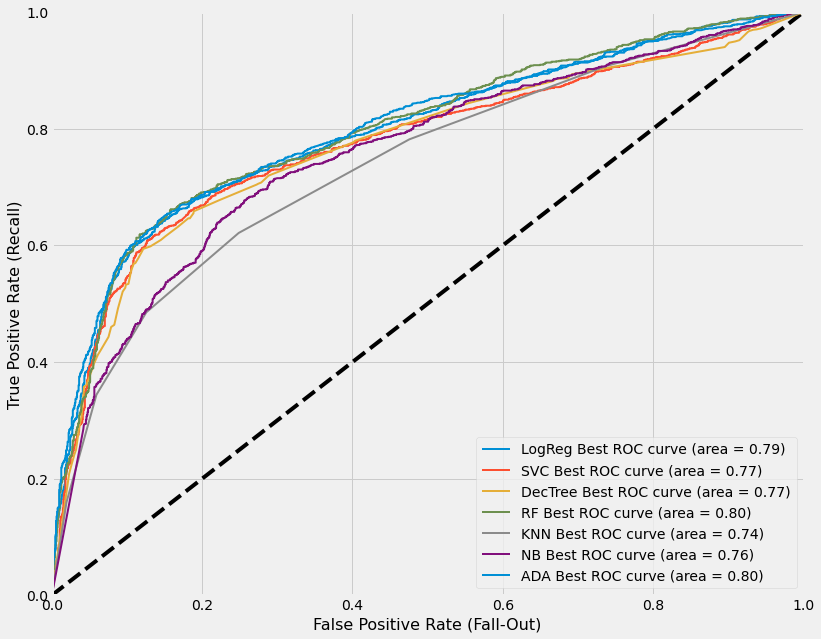

In [149]:
# ROC Curve Best Params
plt.figure(figsize=(12, 10))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

labels=['LogReg Best','SVC Best','DecTree Best', 'RF Best','KNN Best', 'NB Best', 'ADA Best']
for idx,model in enumerate([model_log_best, model_svc_best, model_tree_best , model_rf_best, model_knn_best, model_naive_best, model_ada_best]):
    y_scores = model.predict_proba(X_test_trf)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right", prop={'size': 14})

## **STEP 12 : MODEL INFERENCE**

Menggunakan model yang resedia untuk meprediksi data baru.

### **Logistic Regression**

In [150]:
pred_result = []

model_pred = model_log_best.predict(X_test_trf)
pred_result.append(model_pred)

In [151]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "LR Prediction":pred_result[0]
})
pred_result_log.head(10)

,Actual Target,LR Prediction
39449,1,1
16971,0,0
35721,0,0
2379,0,0
23223,0,0
36820,1,1
4523,0,0
40845,1,1
20885,0,0
916,0,0


### **SVM**

In [152]:
pred_result1 = []

model_pred = model_svc_best.predict(X_test_trf)
pred_result1.append(model_pred)

In [153]:
#insert predict result to dataframe
pred_result_svc = pd.DataFrame({
    "Actual Target":y_test,
    "SVC Prediction":pred_result1[0]
})
pred_result_svc.head(10)

,Actual Target,SVC Prediction
39449,1,1
16971,0,0
35721,0,0
2379,0,0
23223,0,0
36820,1,1
4523,0,0
40845,1,1
20885,0,0
916,0,0


### **Decision Tree**

In [154]:
pred_result2 = []

model_pred = model_tree_best.predict(X_test_trf)
pred_result2.append(model_pred)

In [155]:
#insert predict result to dataframe
pred_result_tree = pd.DataFrame({
    "Actual Target":y_test,
    "Dec.Tree Prediction":pred_result2[0]
})
pred_result_tree.head(10)

,Actual Target,Dec.Tree Prediction
39449,1,1
16971,0,0
35721,0,0
2379,0,0
23223,0,0
36820,1,1
4523,0,0
40845,1,1
20885,0,0
916,0,0


### **Random Forest**

In [156]:
pred_result3 = []

model_pred = model_rf_best.predict(X_test_trf)
pred_result3.append(model_pred)

In [157]:
#insert predict result to dataframe
pred_result_rf = pd.DataFrame({
    "Actual Target":y_test,
    "RF Prediction":pred_result3[0]
})
pred_result_rf.head(10)

,Actual Target,RF Prediction
39449,1,1
16971,0,0
35721,0,0
2379,0,0
23223,0,0
36820,1,1
4523,0,0
40845,1,1
20885,0,0
916,0,0


### **KNN**

In [158]:
pred_result4 = []

model_pred = model_knn_best.predict(X_test_trf)
pred_result4.append(model_pred)

In [159]:
#insert predict result to dataframe
pred_result_knn = pd.DataFrame({
    "Actual Target":y_test,
    "KNN Prediction":pred_result4[0]
})
pred_result_knn.head(10)

,Actual Target,KNN Prediction
39449,1,1
16971,0,0
35721,0,0
2379,0,0
23223,0,0
36820,1,1
4523,0,0
40845,1,1
20885,0,0
916,0,0


### **Naive Bayes**

In [160]:
pred_result5 = []

model_pred = model_naive_best.predict(X_test_trf)
pred_result5.append(model_pred)

In [161]:
#insert predict result to dataframe
pred_result_rf = pd.DataFrame({
    "Actual Target":y_test,
    "NB Prediction":pred_result5[0]
})
pred_result_rf.head(10)

,Actual Target,NB Prediction
39449,1,0
16971,0,0
35721,0,0
2379,0,0
23223,0,0
36820,1,0
4523,0,0
40845,1,1
20885,0,0
916,0,0


### **ADABoost**

In [162]:
pred_result6 = []

model_pred = model_ada_best.predict(X_test_trf)
pred_result6.append(model_pred)

In [163]:
#insert predict result to dataframe
pred_result_ada = pd.DataFrame({
    "Actual Target":y_test,
    "ADA Prediction":pred_result6[0]
})
pred_result_ada.head(10)

,Actual Target,ADA Prediction
39449,1,1
16971,0,0
35721,0,0
2379,0,0
23223,0,0
36820,1,1
4523,0,0
40845,1,1
20885,0,0
916,0,0


## **STEP 13 : CONCLUSION**

### **Overall Analysis EDA**
* Status pekerjaan klien yang paling mendominasi adalah pekerjaan admin dengan persentase **25,3%** , kemudian yang kedua Blue-collar dengan persentase **22,5%** dan tiga terbesar adalah pekerjaan teknisi dengan persentase **16.4%**.

* Status rumah tangga client rata-rata sudah menikah dengan persentase **60.5%**, belum menikah **28,1%** dan cerai **11,2%**.

* Latar belakang pendidikan klien **29,5%** adalah sarjana, **23,1%** sekolah menengah atas dan 3 terbesar adalah tamatan SMP dengan persentase **14,7%**.

* Rata-rata housing status adalah **52,4%** untuk yes dan **45,2%** untuk no, sisanya **2,4%** tidak diketahui.

* Loan status didominasi dengan pilihan no yaitu **82,4%** dan **15,2%** untuk yes.

* Dalam kampanye ini, cara untuk menghubungi klien sebagian besar adalah dengan cara melalui seluler.

* Dari Previous campaign, nilai kegagalan lebih besar dari pada nilai kesuksesan.

#### **Default setting**

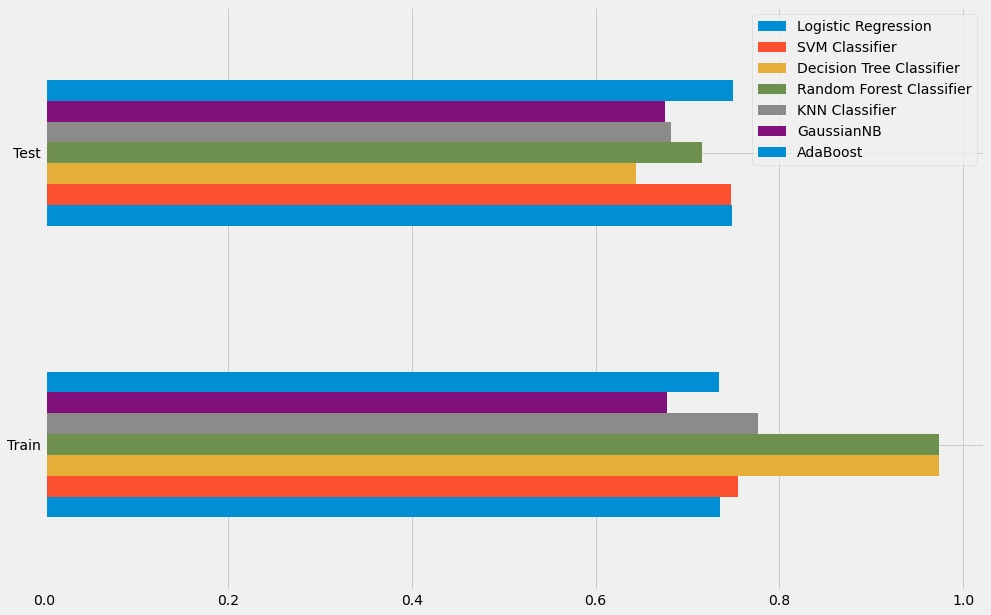

In [164]:
# accuracy
acc_scores_df = pd.DataFrame(acc_scores)
acc_scores_df.plot(kind='barh', figsize=(15, 10))

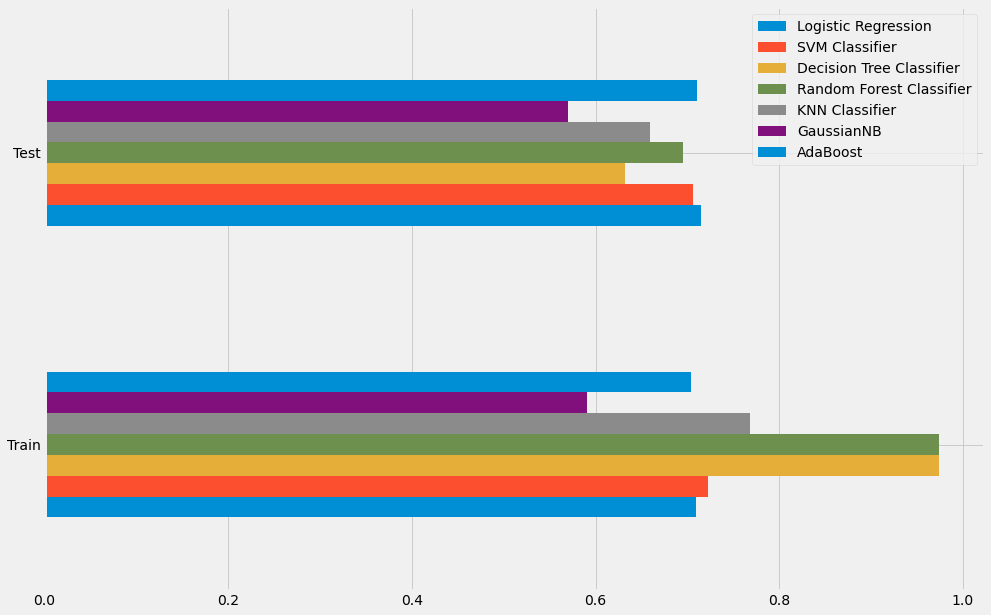

In [165]:
# f1 scores
f1scores_df = pd.DataFrame(f1scores)
f1scores_df.plot(kind='barh', figsize=(15, 10))

#### **Best Params**

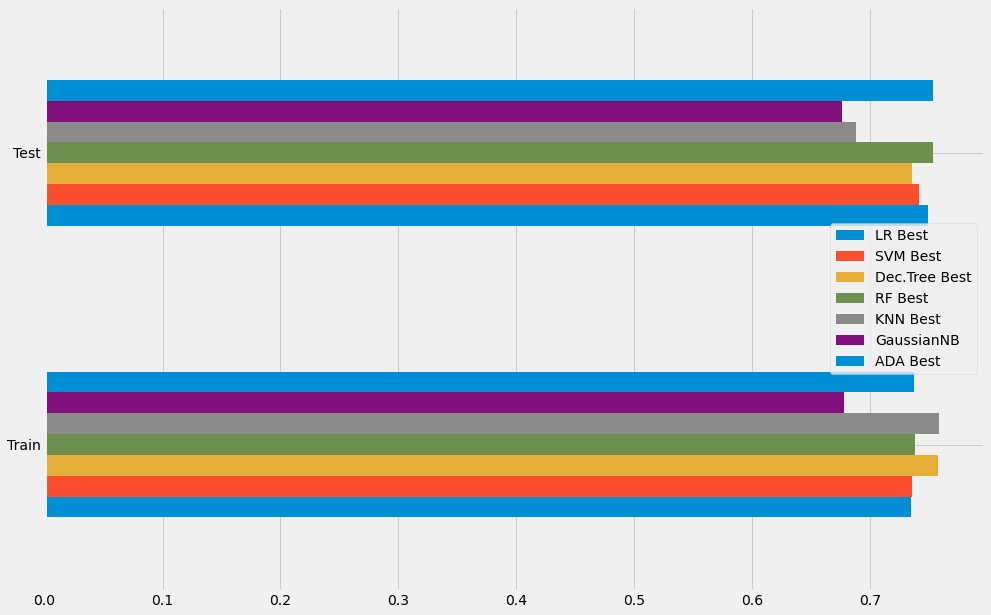

In [166]:
# accuracy
acc_scores_best_df = pd.DataFrame(acc_scores_best)
acc_scores_best_df.plot(kind='barh', figsize=(15, 10))

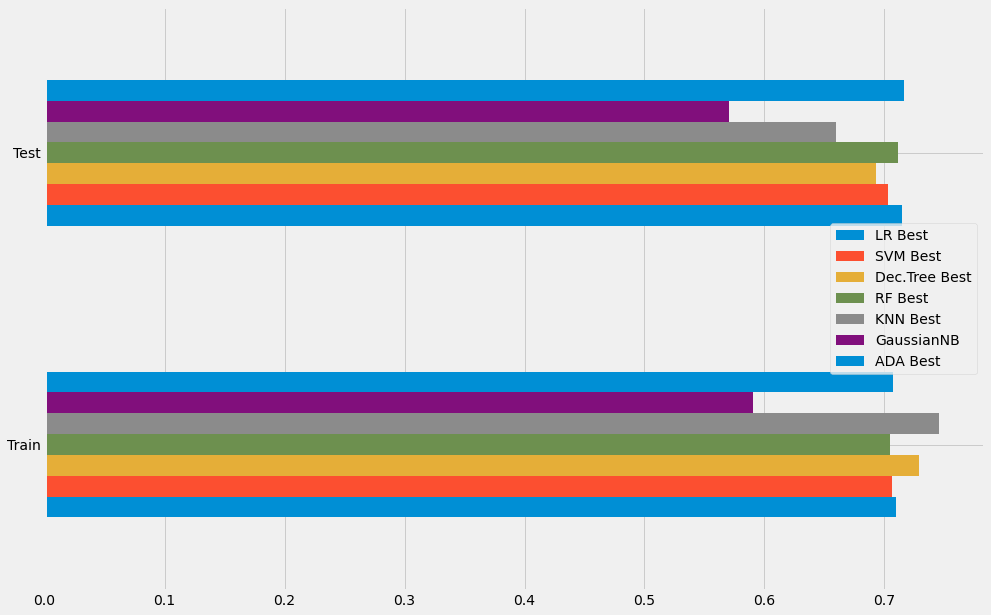

In [167]:
# f1 scores
f1scores_best_df = pd.DataFrame(f1scores_best)
f1scores_best_df.plot(kind='barh', figsize=(15, 10))

### **Model Analysis**

**Default Parameters :**

* Logistic Regression :
 * Accuracy score = 0.7489
 * F1 Score = 0.7143
 * Roc Auc Score = 0.7460

* SVM :
 * Accuracy score = 0.7478
 * F1 Score = 0.7057
 * Roc Auc Score = 0.7443

* Decision Tree :
 * Accuracy score = 0.6444
 * F1 Score = 0.6325
 * Roc Auc Score = 0.6439

* Random Forest :
 * Accuracy score = 0.7159
 * F1 Score = 0.6954
 * Roc Auc Score = 0.7145

* K-Nearest Neighbors :
 * Accuracy score = 0.6825
 * F1 Score = 0.6594
 * Roc Auc Score = 0.6810

* Naive Bayes :
 * Accuracy score = 0.6760
 * F1 Score = 0.5704
 * Roc Auc Score = 0.6694

* ADA Boost :
 * Accuracy score = 0.7493
 * F1 Score = 0.7106
 * Roc Auc Score = 0.7460

**Best Parameters Accuracy score :**

* Logistic Regression :
 * Accuracy score = 0.7489
 * F1 Score = 0.7143
 * Roc Auc Score = 0.7460

* SVM :
 * Accuracy score = 0.7358
 * F1 Score = 0.7060
 * Roc Auc Score = 0.7371

* Decision Tree :
 * Accuracy score = 0.7356
 * F1 Score = 0.6933
 * Roc Auc Score = 0.7322

* Random Forest :
 * Accuracy score = 0.7529
 * F1 Score = 0.7109
 * Roc Auc Score = 0.7493

* K-Nearest Neighbors :
 * Accuracy score = 0.6882
 * F1 Score = 0.6593
 * Roc Auc Score = 0.6863

* Naive Bayes :
 * Accuracy score = 0.6774
 * F1 Score = 0.5904
 * Roc Auc Score = 0.6801

* ADA Boost :
 * Accuracy score = 0.7532
 * F1 Score = 0.7164
 * Roc Auc Score = 0.7501

**Confussion Matrix :**

*(TN: True Negative, FP: False Positive, FN: False Negative, TP: True Positive)*

* Logistic Regression :
 * TN = 1211
 * FP = 221
 * FN = 478
 * TP = 874

* SVM :
 * TN = 1211
 * FP = 221
 * FN = 499
 * TP = 853

* Decision Tree :
 * TN = 1216
 * FP = 216
 * FN = 520
 * TP = 832

* Random Forest :
 * TN = 1250
 * FP = 182
 * FN = 506
 * TP = 846

* K-Nearest Neighbors :
 * TN = 1076
 * FP = 356
 * FN = 512
 * TP = 840

* Naive Bayes :
 * TN = 2889
 * FP = 318
 * FN = 1777
 * TP = 1510

* ADA Boost :
 * TN = 1229
 * FP = 203
 * FN = 484
 * TP = 868

3 Model terbaik dari pengujian dengan menggunakan default parameters adalah model :
* ADA Boost
* Logistic Regression
* SVM

3 Model terbaik dari pengujian dengan menggunakan best parameters adalah model :
* ADA Boost
* Random Forest
* SVM 

Berdasarkan nilai True Negative dapat disimpulkan bahwa Marketers dapat lebih fokus kepada customers yang benar-benar ingin berlangganan daripada customers yang sekiranya hanya memiliki sedikit kesempatan untuk berlangganan.